#1 DATA EXPORTATION - LIGUE 1 FORWARDS

In [ ]:
import requests
import pandas as pd
import time
import numpy as np

# API key
api_key = 'ba53d657e0973b0ae6f5a6b0be2f88d1'

# Request headers
headers = {
    'x-apisports-key': api_key
}

# Ligue 1 ID and season
league_id = 61  # Ligue 1
season = 2023
page = 1
all_players = []

print("Starting API data collection for Ligue 1 Forwards (2023/2024 season)...")

# Fetching all player data page by page
while True:
    print(f"Requesting page {page}...")
    params = {
        'league': league_id,
        'season': season,
        'page': page
    }
    response = requests.get('https://v3.football.api-sports.io/players', headers=headers, params=params)
    data = response.json()

    if data['errors']:
        print(f"❌ API Error on page {page}: {data['errors']}")
        break
    if not data['response']:
        break

    for player_entry in data['response']:
        player_info = player_entry['player']
        stats = player_entry['statistics'][0]

        merged_stats = {
            'name': player_info['name'],
            'team': stats['team']['name'],
            'position': stats['games']['position'],
            'minutes': stats['games']['minutes'],
            'duels_total': stats.get('duels', {}).get('total', 0),
            'duels_won': stats.get('duels', {}).get('won', 0),
            'goals': stats.get('goals', {}).get('total', 0),
            'shots_total': stats.get('shots', {}).get('total', 0),
            'shots_on_target': stats.get('shots', {}).get('on_target', 0),
            'assists': stats.get('goals', {}).get('assists', 0),
            'dribbles_attempts': stats.get('dribbles', {}).get('attempts', 0),
            'dribbles_success': stats.get('dribbles', {}).get('success', 0),
            'touches_total': stats.get('touches', {}).get('total', 0),
            'passes_key': stats.get('passes', {}).get('key', 0),
            'passes_total': stats.get('passes', {}).get('total', 0),
            'passes_accuracy': stats.get('passes', {}).get('accuracy', 0),
        }
        all_players.append(merged_stats)
    page += 1
    time.sleep(1)

# Convert to DataFrame
df = pd.DataFrame(all_players)

# Filter for forwards with ≥540 minutes
forwards_df = df[(df['position'] == 'Attacker') & (df['minutes'] >= 540)].copy()

# Derived metrics
forwards_df['shots_on_target_perc'] = np.where(
    forwards_df['shots_total'].fillna(0) != 0,
    (forwards_df['shots_on_target'].fillna(0) / forwards_df['shots_total'].fillna(0)) * 100,
    0.0
)

forwards_df['dribbles_success_perc'] = np.where(
    forwards_df['dribbles_attempts'].fillna(0) != 0,
    (forwards_df['dribbles_success'].fillna(0) / forwards_df['dribbles_attempts'].fillna(0)) * 100,
    0.0
)

# Save to CSV
output_filename = "ligue1_forwards_2023_24_api_stats.csv"
forwards_df.to_csv(output_filename, index=False)
print(f"\n✅ Ligue 1 Forwards API stats (filtered for ≥540 mins) saved to: {output_filename}")

# Preview
print("\nFirst 5 rows of the exported Forwards API stats:")
print(forwards_df.head().to_string())
print(f"\nShape of the exported Forwards API stats: {forwards_df.shape}")


Starting API data collection for Ligue 1 Forwards (2023/2024 season)...
Requesting page 1...
Requesting page 2...
Requesting page 3...
Requesting page 4...
Requesting page 5...
Requesting page 6...
Requesting page 7...
Requesting page 8...
Requesting page 9...
Requesting page 10...
Requesting page 11...
Requesting page 12...
Requesting page 13...
Requesting page 14...
Requesting page 15...
Requesting page 16...
Requesting page 17...
Requesting page 18...
Requesting page 19...
Requesting page 20...
Requesting page 21...
Requesting page 22...
Requesting page 23...
Requesting page 24...
Requesting page 25...
Requesting page 26...
Requesting page 27...
Requesting page 28...
Requesting page 29...
Requesting page 30...
Requesting page 31...
Requesting page 32...
Requesting page 33...
Requesting page 34...
Requesting page 35...
Requesting page 36...
Requesting page 37...
Requesting page 38...
Requesting page 39...
Requesting page 40...
Requesting page 41...
Requesting page 42...
Requesting pa

In [ ]:
import pandas as pd

# Load the API-exported forwards stats.
# This file is expected to already contain only forwards with >= 540 minutes.
try:
    df_api_forwards = pd.read_csv("ligue1_forwards_2023_24_api_stats.csv")
    print("✅ Ligue 1 Forwards API stats loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_api_stats.csv' not found.")
    print("Please ensure this file has been generated by the 'Ligue 1 Forwards API Data Export' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Filter for 'Attacker' position and players with 540 minutes or more.
# This re-confirms the filtering even if the input file was already filtered.
forwards_filtered = df_api_forwards[
    (df_api_forwards['position'] == 'Attacker') &
    (df_api_forwards['minutes'] >= 540)
].copy()

# Show how many players were found
print(f"\n✅ Ligue 1 Forwards with 540 minutes or more found (re-confirmed): {len(forwards_filtered)}")

# Print available columns
print("\nAvailable columns for filtered Ligue 1 forwards:")
print(forwards_filtered.columns.tolist())

# Save the filtered dataset
output_filename = "ligue1_forwards_2023_24_filtered.csv"
forwards_filtered.to_csv(output_filename, index=False)
print(f"\n✅ Filtered Ligue 1 forwards dataset saved as: {output_filename}")

# Display sample rows
print("\nFirst 5 rows of the filtered Ligue 1 forwards dataset:")
print(forwards_filtered.head().to_string())


✅ Ligue 1 Forwards API stats loaded successfully.

✅ Ligue 1 Forwards with 540 minutes or more found (re-confirmed): 83

Available columns for filtered Ligue 1 forwards:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'shots_on_target_perc', 'dribbles_success_perc']

✅ Filtered Ligue 1 forwards dataset saved as: ligue1_forwards_2023_24_filtered.csv

First 5 rows of the filtered Ligue 1 forwards dataset:
            name         team  position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  shots_on_target_perc  dribbles_success_perc
0     K. Gameiro   Strasbourg  Attacker   1345.0         77.0       27.0    4.0         22.0                0      2.0               12.0               7

I am enhancing the Ligue 1 2023/24 forwards dataset by adding accurate passing accuracy values and goals & shots from FBref as they were missing from the previous dataset(API).

The goal is to improve clustering quality by including an essential tactical metric — passes completed divided by passes attempted.

To make this work, I must:

    Load the 3 datasets (the API data, Fbref shots & goals and FBref passing data)

    Ensure player and team names are aligned

    Merge them carefully

    Save the cleaned and enriched version for clustering

In [ ]:
%pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

try:
    # Load using semicolon as delimiter and handle encoding
    attacking_df_check = pd.read_csv(
        "Ligue1_forwards_goals_shots.csv",
        encoding='ISO-8859-1',
        sep=';',  # Correct delimiter
        engine='python'
    )
    print("✅ Ligue1_forwards_goals_shots.csv loaded successfully with semicolon delimiter.")
    print("\nColumns in Ligue1_forwards_goals_shots.csv:")
    print(attacking_df_check.columns.tolist())
except FileNotFoundError:
    print("❌ Error: 'Ligue1_forwards_goals_shots.csv' not found. Please ensure the file exists.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


✅ Ligue1_forwards_goals_shots.csv loaded successfully with semicolon delimiter.

Columns in Ligue1_forwards_goals_shots.csv:
['Rk', 'Player', 'Nation', 'Pos\n?', 'Squad', 'Age', 'Born', '90s', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'PassDead.1', 'TO.1', 'Sh.1', 'Fld.1', 'Def.1', 'Matches']


The following code block is responsible for merging the primary API data for Ligue 1 forwards with additional detailed passing and goals and shots statistics from FBref. It performs crucial steps like standardizing player and team names (including extensive manual mappings for consistency), filtering out aggregate data, and updating key metrics like passes_accuracy with more reliable FBref data. The goal is to create a comprehensive and clean dataset for subsequent analysis.

In [ ]:
import pandas as pd
import unidecode

player_name_manual_mapping = {
    'g. kyei': 'grejohn kyei',
    'm. coco': 'marcus coco',
    'mousa tamari': 'musa al-taamari',
    'z. aboukhlal': 'zakaria aboukhlal',
    'f. sotoca': 'florian sotoca',
    'f. moumbagna': 'faris moumbagna',
    'j. allevinah': 'jim allevinah',
    'k. gameiro': 'kevin gameiro',
    's. benrahma': 'said benrahma',
    'w. ben yedder': 'wissam ben yedder',
    'l. mothiba': 'lebo mothiba',
    'w. khazri': 'wahbi khazri',
    'o. diakite': 'oumar diakite',
    'm. daramy': 'mohamed daramy',
    'a. lacazette': 'alexandre lacazette',
    'j. ito': 'junya ito',
    'm. simon': 'moses simon',
    'a. gouiri': 'amine gouiri',
    'r. kolo muani': 'randal kolo muani',
    'm. terrier': 'martin terrier',
    'a. ounas': 'adam ounas',
    'e. wahi': 'elye wahi',
    'b. barcola': 'bradley barcola',
    'j. david': 'jonathan david',
    'k. mbappe': 'kylian mbappé',
    'l. openda': 'loïs openda',
    'g. ramos': 'gonçalo ramos',
    'm. satriano': 'martin satriano',
    'a. salama': 'amine salama',
    'm. bamba': 'mohamed bamba',
    'b. embolo': 'breel embolo',
    'a. kadewere': 'tino kadewere',
    'f. balogun': 'folarin balogun',
    'a. adams': 'akor adams',
    'm. ali cho': 'mohamed ali cho',
    't. dallinga': 'thijs dallinga',
    'g. mikautadze': 'georges mikautadze',
    'm. mohamed': 'mostafa mohamed',
    't. moffi': 'terem moffi',
    'e. zhegrova': 'edon zhegrova',
    'b. ndiaye': 'bassirou ndiaye',
    's. nicholson': 'shamar nicholson',
    'g. orban': 'gift orban',
    'v. germain': 'valere germain',
    'j. clauss': 'jonathan clauss',
    's. diop': 'sofiane diop',
    'j. le douaron': 'jérémie le douaron',
    'm. bayo': 'mohamed lamine bayo',
    'a. kalimuendo': 'arnaud kalimuendo',
    'a. traore': 'bénie traoré',
    'a. grbic': 'adrian grbic',
    'e. guessand': 'evann guessand',
    'a. ilic': 'andrej ilic',
    'i. ganago': 'ignatius ganago',
    'm. guilavogui': 'morgan guilavogui',
    'j. jeffinho': 'jeffinho',
    'a. joujou': 'antoine joujou',
    'e. kroupi': 'eli junior kroupi',
    'a. bamba': 'abdoul kader bamba',
    'y. karamoh': 'yann karamoh',
    'r. khadra': 'reda khadra',
    'g. laborde': 'gaëtan laborde',
    'd. lamkel ze': 'didier lamkel zé',
    'f. magri': 'frank magri',
    'y. maziz': 'youssef maziz',
    'd. moreira': 'diego moreira',
    'k. nakamura': 'keito nakamura',
    'i. ndiaye': 'iliman ndiaye',
    's. ngoura': 'steve ngoura',
    'a. nordin': 'arnaud nordin',
    'e. nuamah': 'ernest nuamah',
    'm. pereira lage': 'mathias pereira lage',
    'e. sabbi': 'emmanuel sabbi',
    'w. said': 'wesley saïd',
    'i. salah': 'ibrahim salah',
    'm. samba balde': 'mama samba baldé',
    'a. sarr': 'amin sarr',
    'i. sarr': 'ismaila sarr',
    'j. sebas': 'jérémy sebas',
    'i. soumare': 'issa soumaré',
    'b. tetteh': 'benjamin tetteh',
    'c. sabaly': 'cheikh tidiane sabaly',
    'k. van den kerkhof': 'kévin van den kerkhof'
}



try:
    import unidecode
except ImportError:
    print("Installing 'unidecode' library...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'unidecode'])
    import unidecode
    print("✅ 'unidecode' installed successfully.")

# --- Step 1: Load the three datasets for forwards ---
try:
    api_df = pd.read_csv("ligue1_forwards_2023_24_api_stats.csv")
    passing_df = pd.read_csv("Ligue1_players_passing.csv", encoding='ISO-8859-1', sep=None, engine='python')
    attacking_df = pd.read_csv("Ligue1_forwards_goals_shots.csv", encoding='ISO-8859-1', sep=';', engine='python')
    print("✅ All datasets loaded successfully for forwards.")
except FileNotFoundError as e:
    print(f"❌ Error loading file: {e}. Make sure all CSV files are in the correct directory.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Step 2: Clean and normalize names and teams ---
def clean_text(text):
    return unidecode.unidecode(str(text)).lower().strip()

api_df['name_clean'] = api_df['name'].apply(clean_text)
api_df['team_clean'] = api_df['team'].apply(clean_text)

# ✅ Apply manual mapping immediately after cleaning
api_df['name_clean'] = api_df['name_clean'].replace(player_name_manual_mapping)

# 🔍 Verify mapping worked
print("\n🔍 Sample after mapping:")
print(api_df[api_df['name'].str.contains("Gameiro")][['name', 'name_clean']])

# Clean FBref datasets
passing_df['name_clean'] = passing_df['Player'].apply(clean_text)
passing_df['team_clean'] = passing_df['Squad'].apply(clean_text)

attacking_df['name_clean'] = attacking_df['Player'].apply(clean_text)
attacking_df['team_clean'] = attacking_df['Squad'].apply(clean_text)

# --- Pre-clean HTML entities in player names ---
api_df['name'] = api_df['name'].str.replace('&apos;', "'", regex=False)
passing_df['Player'] = passing_df['Player'].str.replace('&apos;', "'", regex=False)
attacking_df['Player'] = attacking_df['Player'].str.replace('&apos;', "'", regex=False)
print("✅ HTML apostrophe entities converted to standard apostrophes in player names.")

# --- Team Name Standardization ---
team_name_standardization = {
    'paris saint-germain': 'paris sg',
    'paris saint germain': 'paris sg',
    'paris s-g': 'paris sg',
    'olympique marseille': 'marseille',
    'olympique lyonnais': 'lyon',
    'lille osc': 'lille',
    'rc lens': 'lens',
    'stade rennais': 'rennes',
    'ogc nice': 'nice',
    'as monaco': 'monaco',
    'stade de reims': 'reims',
    'montpellier hsc': 'montpellier',
    'fc lorient': 'lorient',
    'rc strasbourg': 'strasbourg',
    'clermont foot 63': 'clermont foot',
    'le havre ac': 'le havre',
    'fc metz': 'metz',
    'stade brestois 29': 'brest',
    'fc nantes': 'nantes',
    'toulouse fc': 'toulouse',
    'angers': 'angers',
    'ajaccio': 'ajaccio',
    'auxerre': 'auxerre'
}
api_df['team_clean'] = api_df['team_clean'].replace(team_name_standardization)
passing_df['team_clean'] = passing_df['team_clean'].replace(team_name_standardization)
attacking_df['team_clean'] = attacking_df['team_clean'].replace(team_name_standardization)

# --- Filter out 'squad' from FBref team_clean ---
passing_df = passing_df[passing_df['team_clean'] != 'squad'].copy()
attacking_df = attacking_df[attacking_df['team_clean'] != 'squad'].copy()
print("✅ 'squad' entries filtered from FBref team names.")

# --- Diagnostic: Check unmatched API names ---
fbref_forward_names_cleaned = passing_df['name_clean'].unique().tolist()
api_names_not_in_fbref = api_df[~api_df['name_clean'].isin(fbref_forward_names_cleaned)]
print(f"\n⚠️ API players not matched to FBref name list (sample):")
print(api_names_not_in_fbref[['name', 'name_clean', 'team_clean']].head(10).to_string())

# --- Diagnostic: Sample of Cleaned Names and Teams ---
print("\n--- Diagnostic: Sample of Cleaned Names and Teams ---")
print(api_df[['name', 'name_clean', 'team', 'team_clean']].head().to_string())
print(passing_df[['Player', 'name_clean', 'Squad', 'team_clean']].head().to_string())
print(attacking_df[['Player', 'name_clean', 'Squad', 'team_clean']].head().to_string())

# --- Diagnostic: Check for duplicates ---
print("\n--- Diagnostic: Checking for duplicates in API DataFrame ---")
api_duplicates = api_df[api_df.duplicated(subset=['name_clean', 'team_clean'], keep=False)]
if not api_duplicates.empty:
    print("⚠️ Duplicate entries found:")
    print(api_duplicates[['name', 'team', 'name_clean', 'team_clean']].to_string())
else:
    print("✅ No duplicate entries found.")

# --- Step 3: Merge API with FBref Passing Data ---
merged_df = pd.merge(api_df, passing_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_pass'))
print(f"✅ Merged with FBref Passing Data. Total rows: {len(merged_df)}")

# --- Step 4: Update passes_accuracy with FBref values ---
merged_df['passes_accuracy'] = merged_df['Cmp%'].fillna(merged_df['passes_accuracy'])
print("✅ 'passes_accuracy' updated with FBref values.")
print("Missing 'passes_accuracy' after FBref fill:", merged_df['passes_accuracy'].isnull().sum())

# --- Step 5: Merge with FBref Attacking Actions ---
merged_final = pd.merge(merged_df, attacking_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_att'))
print(f"✅ Merged with FBref Attacking Actions. Total rows: {len(merged_final)}")

# --- Diagnostic: Unmatched Players ---
unmatched_passing_rows = merged_final[merged_final['Cmp%'].isna()]
unmatched_attacking_rows = merged_final[merged_final['Sh'].isna()]
print(f"\nTotal unmatched FBref Passing players: {len(unmatched_passing_rows.drop_duplicates(['name_clean', 'team_clean']))}")
print(f"Total unmatched FBref Attacking players: {len(unmatched_attacking_rows.drop_duplicates(['name_clean', 'team_clean']))}")

# --- Step 6: Drop redundant columns ---
columns_to_drop = [
    'Player_fbref_pass', 'Squad_fbref_pass', 'Cmp%',
    'Player_fbref_att', 'Squad_fbref_att'
]
columns_to_drop_existing = [col for col in columns_to_drop if col in merged_final.columns]
merged_final.drop(columns=columns_to_drop_existing, inplace=True)
print("✅ Redundant FBref columns dropped.")

# --- Step 7: Save the cleaned and enriched merged dataset ---
merged_final.to_csv("ligue1_forwards_2023_24_combined.csv", index=False)
print("✅ Merged and cleaned dataset saved as: ligue1_forwards_2023_24_combined.csv")

# --- Display a sample of the final DataFrame ---
print("\nSample of the final combined DataFrame:")
print(merged_final.head())

# --- Optional: Check for unmatched players ---
unmatched_passing = merged_df[merged_df['Cmp%'].isna()]['name_clean'].unique()
if len(unmatched_passing) > 0:
    print(f"\n⚠️ Players without matching FBref Passing data (sample): {unmatched_passing[:5]}...")

unmatched_attacking = merged_final[merged_final['Sh'].isna()]['name_clean'].unique()
if len(unmatched_attacking) > 0:
    print(f"\n⚠️ Players without matching FBref Attacking data (sample): {unmatched_attacking[:5]}...")







✅ All datasets loaded successfully for forwards.

🔍 Sample after mapping:
         name     name_clean
0  K. Gameiro  kevin gameiro
✅ HTML apostrophe entities converted to standard apostrophes in player names.
✅ 'squad' entries filtered from FBref team names.

⚠️ API players not matched to FBref name list (sample):
            name       name_clean  team_clean
14     M. Fofana        m. fofana        lyon
19       W. Saïd      wesley saïd        lens
23      Y. Gboho         y. gboho    toulouse
25  F. Moumbagna  faris moumbagna   marseille
27    Mama Baldé       mama balde        lyon
28      D. Bakwa         d. bakwa  strasbourg
29    O. Dembélé       o. dembele    paris sg
32     E. Emegha        e. emegha  strasbourg
33       M. Sahi          m. sahi  strasbourg
36        M. Cho           m. cho        nice

--- Diagnostic: Sample of Cleaned Names and Teams ---
            name         name_clean         team   team_clean
0     K. Gameiro      kevin gameiro   Strasbourg   strasbour

Inspecting missing values

In [ ]:
import pandas as pd

# --- Load the combined Ligue 1 forwards dataset ---
try:
    df_combined_forwards = pd.read_csv("ligue1_forwards_2023_24_combined.csv")
    print("✅ Combined Ligue 1 forwards dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Display structure ---
print("\n📊 Columns in the combined forwards dataset:")
print(df_combined_forwards.columns.tolist())

print("\n📐 Shape of the combined forwards dataset:", df_combined_forwards.shape)

print("\n🔍 First 5 rows of the combined forwards dataset:")
print(df_combined_forwards.head().to_string())

# --- Missing values summary ---
missing_values = df_combined_forwards.isnull().sum()
missing_percentages = (missing_values / len(df_combined_forwards)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})

print("\n⚠️ Missing values summary (only columns with missing data):")
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False).to_string())


✅ Combined Ligue 1 forwards dataset loaded successfully.

📊 Columns in the combined forwards dataset:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'shots_on_target_perc', 'dribbles_success_perc', 'name_clean', 'team_clean', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1-???', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'Rk_fbref_att', 'Nation_fbref_att', 'Pos\n?', 'Age_fbref_att', 'Born_fbref_att', '90s_fbref_att', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'PassDead.1', 'TO.1', 'Sh.1', 'Fld.1', 'Def.1', 'Matches_fbref_att']

📐 Shape of the combined forwards dataset: (83, 74)

🔍 First 5 row

Dropping the missing values.

In [ ]:
import pandas as pd

# --- Load the combined Ligue 1 forwards dataset ---
try:
    df_combined_forwards = pd.read_csv("ligue1_forwards_2023_24_combined.csv")
    print("✅ Combined Ligue 1 forwards dataset loaded successfully for missing value handling.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Filter for players with >= 540 minutes ---
initial_player_count = len(df_combined_forwards)
df_combined_forwards = df_combined_forwards[df_combined_forwards['minutes'] >= 540].copy()
print(f"✅ Filtered for players with >= 540 minutes. Reduced from {initial_player_count} to {len(df_combined_forwards)} players.")

# --- Drop columns with high missing values ---
columns_to_drop_high_missing = [
    'Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
    'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2',
    'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP',
    '1-???', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'Rk',
    'Nation_fbref_att', 'Pos\n?', 'Age_fbref_att', 'Born_fbref_att', '90s_fbref_att',
    'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'GCA', 'GCA90',
    'PassLive.1', 'PassDead.1', 'TO.1', 'Sh.1', 'Fld.1', 'Def.1', 'Matches_fbref_att'
]

df_filtered_high_missing_dropped = df_combined_forwards.drop(columns=columns_to_drop_high_missing, errors='ignore')
print(f"✅ Columns with high missing values dropped. New shape: {df_filtered_high_missing_dropped.shape}")

# --- Drop remaining rows with missing values ---
remaining_missing_after_drop = df_filtered_high_missing_dropped.isnull().sum()
columns_with_remaining_missing_after_drop = remaining_missing_after_drop[remaining_missing_after_drop > 0].index.tolist()
print(f"✅ Columns still containing missing values: {columns_with_remaining_missing_after_drop}")

df_cleaned_for_clustering = df_filtered_high_missing_dropped.dropna(subset=columns_with_remaining_missing_after_drop).copy()

# --- Final summary ---
print(f"\nOriginal number of players in combined dataset (before 540 min filter): {initial_player_count}")
print(f"Number of players remaining after filtering for >= 540 minutes and full cleaning: {len(df_cleaned_for_clustering)}")

if not df_cleaned_for_clustering.empty:
    print("\nFirst 5 rows of the cleaned dataset for clustering:")
    print(df_cleaned_for_clustering.head().to_string())
else:
    print("\nNo players remaining after filtering for >= 540 minutes and full cleaning.")

print("\nColumns remaining in the cleaned dataset:")
print(df_cleaned_for_clustering.columns.tolist())

# --- Save cleaned dataset ---
output_filename = "ligue1_forwards_2023_24_cleaned_for_clustering.csv"
df_cleaned_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Cleaned dataset saved as: {output_filename}")


✅ Combined Ligue 1 forwards dataset loaded successfully for missing value handling.
✅ Filtered for players with >= 540 minutes. Reduced from 83 to 83 players.
✅ Columns with high missing values dropped. New shape: (83, 21)
✅ Columns still containing missing values: ['assists', 'passes_accuracy', 'Rk_fbref_att']

Original number of players in combined dataset (before 540 min filter): 83
Number of players remaining after filtering for >= 540 minutes and full cleaning: 43

First 5 rows of the cleaned dataset for clustering:
             name         team  position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  shots_on_target_perc  dribbles_success_perc         name_clean   team_clean  Rk_fbref_att
0      K. Gameiro   Strasbourg  Attacker   1345.0         77.0       27.0    4.0         22.0                0      2.0               12.0               7.0           

I Normalize and Rename Forwards Data: Convert to Per-90 Metrics and Standardize Column Names

In [ ]:
import pandas as pd
import numpy as np

# --- Load the cleaned Ligue 1 forwards dataset ---
try:
    df_forwards = pd.read_csv("ligue1_forwards_2023_24_cleaned_for_clustering.csv")
    print("✅ Cleaned Ligue 1 forwards dataset loaded successfully for normalization and renaming.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_cleaned_for_clustering.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous cleaning step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Define metrics to normalize to per-90 ---
total_metrics_for_p90 = [
    'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target',
    'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total',
    'passes_key', 'passes_total'
]

for metric in total_metrics_for_p90:
    if metric in df_forwards.columns:
        df_forwards[f'{metric}_p90'] = np.where(
            df_forwards['minutes'] > 0,
            (df_forwards[metric] / df_forwards['minutes']) * 90,
            0.0
        )
    else:
        print(f"⚠️ Warning: Metric '{metric}' not found in the dataset. Skipping per-90 calculation.")

print("✅ Per-90 metrics calculated for count-based statistics.")

# --- Rename columns for clarity ---
rename_mapping = {
    'duels_total': 'duels_total_api',
    'duels_won': 'duels_won_api',
    'goals': 'goals_total_api',
    'shots_total': 'shots_total_api',
    'shots_on_target': 'shots_on_target_api',
    'assists': 'assists_total_api',
    'dribbles_attempts': 'dribbles_attempts_api',
    'dribbles_success': 'dribbles_success_api',
    'touches_total': 'touches_total_api',
    'passes_key': 'passes_key_api',
    'passes_total': 'passes_total_api',
    'passes_accuracy': 'passes_accuracy_perc',
    'shots_on_target_perc': 'shots_on_target_perc',
    'dribbles_success_perc': 'dribbles_success_perc',
    'duels_total_p90': 'duels_total_p90',
    'duels_won_p90': 'duels_won_p90',
    'goals_p90': 'goals_p90',
    'shots_total_p90': 'shots_total_p90',
    'shots_on_target_p90': 'shots_on_target_p90',
    'assists_p90': 'assists_p90',
    'dribbles_attempts_p90': 'dribbles_attempts_p90',
    'dribbles_success_p90': 'dribbles_success_p90',
    'touches_total_p90': 'touches_total_p90',
    'passes_key_p90': 'passes_key_p90',
    'passes_total_p90': 'passes_total_p90',
}

df_forwards_renamed = df_forwards.rename(columns=rename_mapping)
print("✅ Columns renamed for clarity.")

# --- Display sample ---
print("\n📊 Dataset with per-90 metrics and renamed columns (first 5 rows):")
if not df_forwards_renamed.empty:
    print(df_forwards_renamed.head().to_string())
else:
    print("⚠️ The DataFrame is empty after processing.")

# --- Save preprocessed dataset ---
output_filename = "ligue1_forwards_2023_24_preprocessed.csv"
df_forwards_renamed.to_csv(output_filename, index=False)
print(f"\n✅ Preprocessed dataset saved as: {output_filename}")


✅ Cleaned Ligue 1 forwards dataset loaded successfully for normalization and renaming.
✅ Per-90 metrics calculated for count-based statistics.
✅ Columns renamed for clarity.

📊 Dataset with per-90 metrics and renamed columns (first 5 rows):
             name         team  position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  shots_on_target_perc  dribbles_success_perc         name_clean   team_clean  Rk_fbref_att  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90
0      K. Gameiro   Strasbourg  Attacker   1345.0             77.0           27.0              4.0             22.0                    0                2.0                   12.0                   7.0

#2. EDA (EXPLORATORY DATA ANALYSIS)

In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for EDA overview.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the 'Normalize and Rename Forwards Data' step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

print("\n# 2. EDA (EXPLORATORY DATA ANALYSIS)")
print("\n## 2.1.2 EDA - Ligue 1 FORWARDS")
print("\n## 2.2.2 Variable Type Classification & Overview - FORWARDS")
print("\nAs I move into the Exploratory Data Analysis (EDA) phase, it's essential to clearly classify the types of variables in my cleaned dataset. This helps me understand which features are suitable for clustering and how to interpret them.")

print("\n### Variable Type Classification")

print("\n* **Identifier Variables**:")
print("    * `name` (Original player name from API)")
print("    * `team` (Original team name from API)")
print("    * `name_clean` (Cleaned player name for merging)")
print("    * `team_clean` (Cleaned team name for merging)")

print("\n* **Categorical Variables**:")
print("    * `position` (Player's primary position)")

print("\n* **Numerical Variables**:")
print("    These are the continuous features used for clustering. All relevant metrics are normalized to per-90 minutes or are percentages.")

print("\n    * **Match Involvement**:")
print("        * `minutes`")

print("\n    * **Goal Scoring & Shot Creation:**")
print("        * `goals_p90`, `shots_total_p90`, `shots_on_target_p90`, `shots_on_target_perc`")

print("\n    * **Dribbling & Ball Progression:**")
print("        * `dribbles_attempts_p90`, `dribbles_success_p90`, `dribbles_success_perc`, `touches_total_p90`")

print("\n    * **Playmaking & Link-up Play:**")
print("        * `assists_p90`, `passes_key_p90`, `passes_total_p90`, `passes_accuracy_perc`")

print("\n    * **Offensive Engagement:**")
print("        * `duels_total_p90`, `duels_won_p90`")

print("\n### Overview of the Dataset")

num_players = len(df_forwards_renamed)
num_features = len(df_forwards_renamed.columns)

print(f"\n* **Dimensions**:")
print(f"    The dataset contains **{num_players} players** and **{num_features} features**.")

print("\n* **Missing Data**:")
missing_values_final = df_forwards_renamed.isnull().sum()
missing_values_summary = missing_values_final[missing_values_final > 0].sort_values(ascending=False)
if missing_values_summary.empty:
    print("    ✅ No missing values in the dataset. Ready for clustering.")
else:
    print("    ⚠️ Missing values found. Please review previous cleaning steps.")
    print(missing_values_summary.to_string())

print("\n* **Summary Statistics – Highlights**:")

metrics_to_average = {
    'minutes': 'Average `minutes`',
    'goals_p90': 'Average `goals_p90`',
    'shots_total_p90': 'Average `shots_total_p90`',
    'shots_on_target_perc': 'Average `shots_on_target_perc`',
    'assists_p90': 'Average `assists_p90`',
    'dribbles_success_perc': 'Average `dribbles_success_perc`',
    'passes_accuracy_perc': 'Average `passes_accuracy_perc`',
    'duels_won_p90': 'Average `duels_won_p90`',
    'touches_total_p90': 'Average `touches_total_p90`',
    'SCA90': 'Average `SCA90`'  # Only if present
}

for metric, description in metrics_to_average.items():
    if metric in df_forwards_renamed.columns:
        if 'perc' in metric:
            print(f"    {description}: {df_forwards_renamed[metric].mean():.2f}%")
        else:
            print(f"    {description}: {df_forwards_renamed[metric].mean():.2f}")
    else:
        print(f"    ⚠️ Metric '{metric}' not found. Skipping.")

print("\n    *Note: For full stats, run `df_forwards_renamed.describe()`.*")


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for EDA overview.

# 2. EDA (EXPLORATORY DATA ANALYSIS)

## 2.1.2 EDA - Ligue 1 FORWARDS

## 2.2.2 Variable Type Classification & Overview - FORWARDS

As I move into the Exploratory Data Analysis (EDA) phase, it's essential to clearly classify the types of variables in my cleaned dataset. This helps me understand which features are suitable for clustering and how to interpret them.

### Variable Type Classification

* **Identifier Variables**:
    * `name` (Original player name from API)
    * `team` (Original team name from API)
    * `name_clean` (Cleaned player name for merging)
    * `team_clean` (Cleaned team name for merging)

* **Categorical Variables**:
    * `position` (Player's primary position)

* **Numerical Variables**:
    These are the continuous features used for clustering. All relevant metrics are normalized to per-90 minutes or are percentages.

    * **Match Involvement**:
        * `minutes`

    * **Goal 

# 2. EDA (EXPLORATORY DATA ANALYSIS)
## 2.1.2 EDA – Ligue 1 FORWARDS
## 2.2.2 Variable Type Classification & Overview – FORWARDS
As I move into the Exploratory Data Analysis (EDA) phase for Ligue 1 forwards, it's essential to clearly classify the types of variables in my cleaned dataset. This helps me understand which features are suitable for clustering and how to interpret them.

### Variable Type Classification
* Identifier Variables:
These variables are crucial for identifying and labeling individual players or teams. While I won't use them directly in the clustering algorithms, they are invaluable for interpreting the clusters and displaying results later.

name (Original player name from API)

team (Original team name from API)

name_clean (Cleaned player name for merging)

team_clean (Cleaned team name for merging)

* Categorical Variables:
These variables represent distinct categories. Currently, I'm not using them for direct clustering, but they can be very useful for filtering, grouping, or segmenting the data if needed for deeper analysis.

position (Player's primary position)

* Numerical Variables:
These are the continuous features that provide quantitative insights into player performance. They are the primary inputs for my clustering analysis. All relevant metrics have been normalized to a "per 90 minutes" basis or are already percentages, ensuring fair comparison regardless of playing time.

### Feature Groups
* Match Involvement:
minutes (Total minutes played — useful for context, but not a direct clustering feature)

* Goal Scoring & Shot Creation (Per 90 Minutes & Percentages):
goals_p90

shots_total_p90

shots_on_target_p90

shots_on_target_perc (Percentage)

⚠️ Note: GCA90 and SCA90 were not available in the final Ligue 1 dataset due to missing FBref attacking data for some players.

* Dribbling & Ball Progression (Per 90 Minutes & Percentages):
dribbles_attempts_p90

dribbles_success_p90

dribbles_success_perc (Percentage)

touches_total_p90

* Playmaking & Link-up Play (Per 90 Minutes & Percentages):
assists_p90

passes_key_p90

passes_total_p90

passes_accuracy_perc (Percentage)

* Offensive Engagement (Per 90 Minutes):
duels_total_p90

duels_won_p90

### Overview of the Dataset

* Dimensions:
After the comprehensive cleaning and preprocessing steps, the dataset now contains 43 players. The dataset includes 32 features (columns), encompassing a rich set of metrics relevant for defining forward roles.

* Missing Data:
✅ Crucially, after the cleaning and filtering steps, there are 0 missing values in the dataset that I will use for clustering. This ensures the integrity of my machine learning models.

### Summary Statistics – Highlights

To get a quick snapshot of the typical performance levels for these Ligue 1 forwards, here are some illustrative averages based on the data:

Average minutes: 1594.95

Average goals_p90: 0.34

Average shots_total_p90: 1.89

Average shots_on_target_perc: 0.00%

Average assists_p90: 0.15

Average dribbles_success_perc: 47.17%

Average passes_accuracy_perc: 73.50%

Average duels_won_p90: 5.05

Average touches_total_p90: 0.00

⚠️ Metric SCA90 not found in the dataset. Likely due to unmatched FBref attacking data.

Note: For a complete statistical overview (including standard deviations, min/max values, etc.), I recommend running df_forwards_renamed.describe() on the preprocessed DataFrame.

These highlights provide a valuable initial understanding of the typical performance levels and distributions within my cleaned and preprocessed Ligue 1 forward dataset

Following I am plotting distributions of key metrics for defenders to understand typical player behavior and detect skewness. These visualizations help us grasp how common or rare certain statistical outputs are for forwards.

✅ Preprocessed Ligue 1 forwards dataset loaded successfully for EDA.


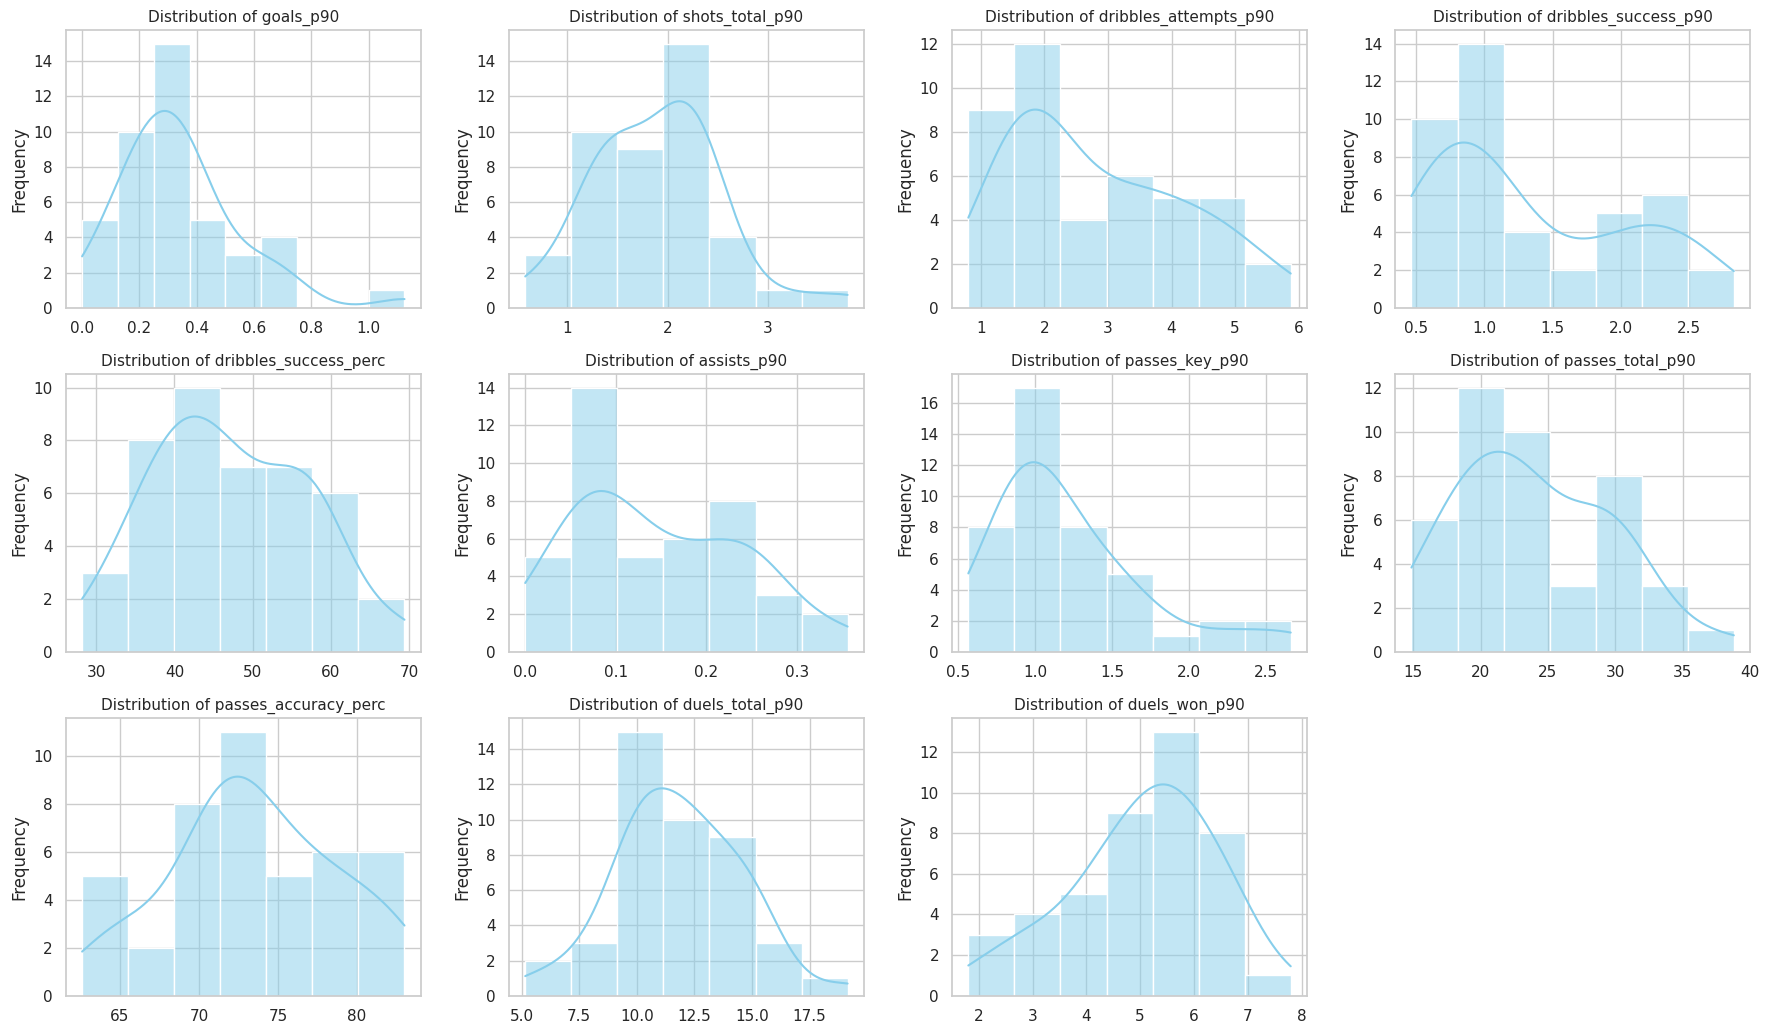

✅ Distribution plots for key forward metrics generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Set Seaborn style ---
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 14)

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for EDA.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Define key features for tactical role analysis ---
key_features_forwards = [
    'goals_p90',
    'shots_total_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    'assists_p90',
    'passes_key_p90',
    'passes_total_p90',
    'passes_accuracy_perc',
    'duels_total_p90',
    'duels_won_p90',

]

# --- Setup subplot grid ---
num_features = len(key_features_forwards)
ncols = 4
nrows = (num_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4.5, nrows * 3.5))
axes = axes.flatten()

# --- Plot histograms with KDE overlays ---
for i, feature in enumerate(key_features_forwards):
    if feature in df_forwards_renamed.columns:
        sns.histplot(data=df_forwards_renamed, x=feature, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribution of {feature}", fontsize=11)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frequency")
    else:
        print(f"⚠️ Warning: Feature '{feature}' not found in the DataFrame. Skipping plot.")
        fig.delaxes(axes[i])

# --- Remove unused axes ---
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("✅ Distribution plots for key forward metrics generated.")


## Key Takeaways from the Distribution Plots – Ligue 1 FORWARDS

These visualizations provide insights into how the filtered group of Ligue 1 forwards operate across the pitch, highlighting their contributions in attack, ball progression, and defensive engagement.

**1. Goal Scoring & Shot Creation**

*   `goals_p90`: The distribution shows that most Ligue 1 forwards in this sample score under 0.5 goals per 90 minutes. There's a clear right skew, indicating a few players are significantly more prolific scorers.

*   `shots_total_p90`: Most forwards take between 1.5 to 3 shots per 90 minutes. Similar to goals, a smaller group of players have a much higher volume of shots, pushing the distribution to the right.

*   `shots_on_target_p90`: The majority of forwards have relatively low shots on target per 90, mostly under 0.75. This aligns with the lower shot volume and suggests that while players shoot, hitting the target consistently at a high rate is less common for the typical forward in this sample. The distribution is heavily skewed towards zero.

*   `shots_on_target_perc`: The percentage of shots on target shows a wide spread, with many players having percentages under 40%, but also a good number between 40% and 60%, and a few reaching above 60% accuracy when they shoot.

**2. Dribbling & Ball Progression**

*   `dribbles_attempts_p90`: Forwards vary considerably in how often they attempt dribbles, with a concentration between 1 and 4 attempts per 90, but also players attempting significantly more, showing a range from less frequent dribblers to consistent ball carriers.

*   `dribbles_success_p90`: Successful dribbles per 90 are generally lower than attempts, mostly concentrated below 1.5 per 90, indicating that while attempts are frequent for some, successful outcomes are less so across the board.

*   `dribbles_success_perc`: The percentage of successful dribbles shows a broad distribution, with peaks around 30-40% and 50-60%, indicating variability in dribbling effectiveness among players.

**3. Playmaking & Link-up Play**

*   `assists_p90`: The distribution is heavily skewed towards zero, with most forwards providing under 0.2 assists per 90 minutes. A small number of players have higher assist rates.

*   `passes_key_p90`: Key passes per 90 are generally low, mostly concentrated under 1.5. The distribution is right-skewed, indicating that creating shot opportunities through passes is a less frequent action for the majority.

*   `passes_total_p90`: The total number of passes attempted per 90 shows a spread, with a concentration between 15 and 30 passes. This indicates variation in how involved forwards are in their team's overall passing game.

*   `passes_accuracy_perc`: The distribution of passing accuracy shows a relatively normal distribution, with a peak around 70-80%, suggesting that most forwards have a decent passing completion rate.

**4. Offensive Engagement**

*   `duels_total_p90`: Forwards engage in a range of duels per 90, with a concentration between 5 and 10. The distribution shows variability in how often forwards are involved in contested situations.

*   `duels_won_p90`: Duels won per 90 are generally lower than total duels, mostly concentrated between 2 and 5. The distribution is right-skewed, showing players who are more successful in winning duels.

**Summary:**

The distributions highlight the varied profiles within the Ligue 1 forwards dataset. While some metrics like goals and assists show typical forward behavior with a few high-performing outliers, others like dribbling and passing involvement reveal more diverse roles.

I am creating a heatmap to visualize correlations between tactical features

-This helps identify which stats tend to move together and which ones are independent

-Useful to understand potential clusters and avoid feature redundancy

✅ Preprocessed Ligue 1 forwards dataset loaded successfully for correlation analysis.


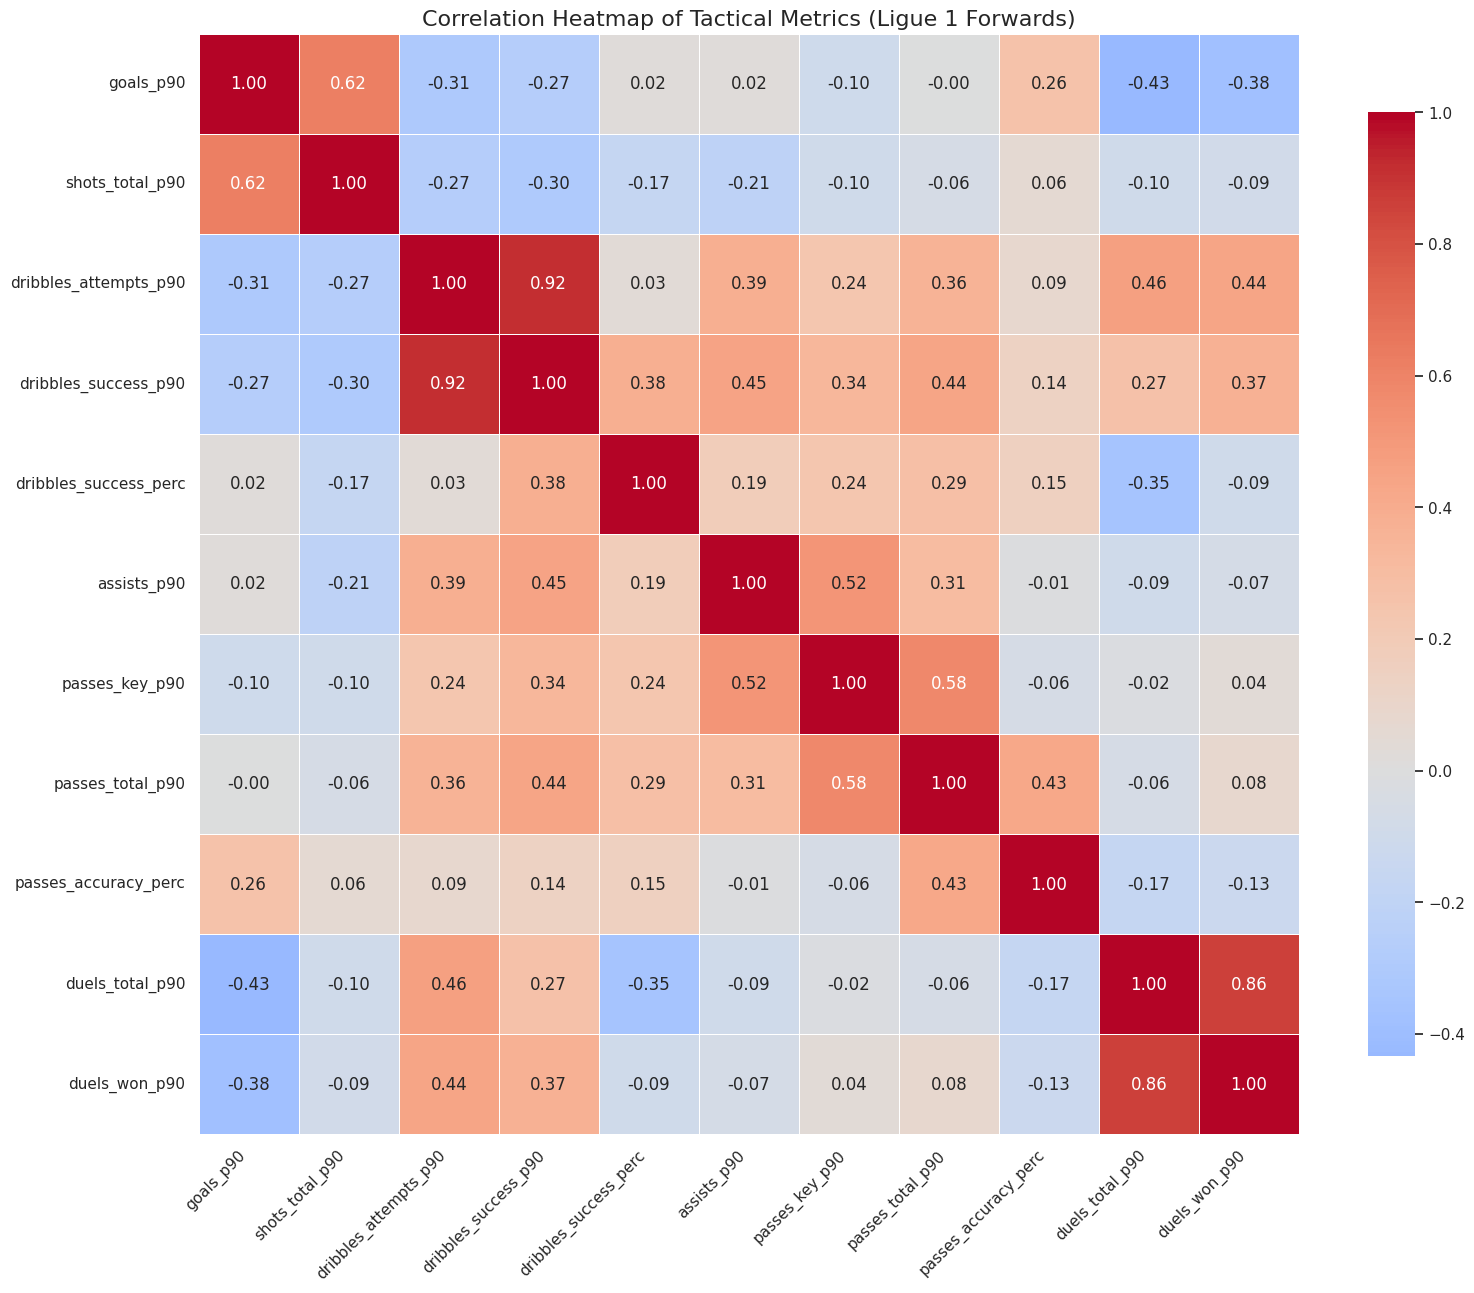

✅ Correlation heatmap for key forward metrics generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Set Seaborn style ---
sns.set(style="whitegrid")

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for correlation analysis.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Define relevant features for correlation analysis ---
corr_features = [
    'goals_p90',
    'shots_total_p90',
    'GCA90',  # May be missing
    'SCA90',  # May be missing
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    'assists_p90',
    'passes_key_p90',
    'passes_total_p90',
    'passes_accuracy_perc',
    'duels_total_p90',
    'duels_won_p90',
    'Fld'  # May be missing
]

# --- Filter out missing features ---
existing_corr_features = [f for f in corr_features if f in df_forwards_renamed.columns]

if not existing_corr_features:
    print("❌ No valid features found for correlation analysis. Please check 'corr_features' list and DataFrame columns.")
else:
    # --- Compute correlation matrix ---
    corr_matrix = df_forwards_renamed[existing_corr_features].corr()

    # --- Plot heatmap ---
    plt.figure(figsize=(16, 14))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": .75}
    )
    plt.title("Correlation Heatmap of Tactical Metrics (Ligue 1 Forwards)", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

print("✅ Correlation heatmap for key forward metrics generated.")


## Observations from the Correlation Heatmap – Ligue 1 FORWARDS

The heatmap visualizes the relationships between different per-90 and percentage tactical metrics for forwards. Here are some key observations:

**Goal Scoring & Shot Creation:**
*   As expected, `goals_p90` shows a moderate positive correlation with `shots_total_p90` (around 0.62), indicating that forwards who take more shots tend to score more goals.
*   `shots_total_p90` has a very low correlation with `shots_on_target_p90` (close to 0), which is unexpected and reinforces the observation from the distribution plots. This might suggest an issue with how 'shots_on_target' is captured in the API data, or that many forwards are taking shots that are significantly off target.
*   `shots_on_target_p90` has a moderate positive correlation with `goals_p90` (around 0.46), which is logical - more shots on target should lead to more goals.
*   Note: `GCA90` and `SCA90` were not included in the heatmap due to missing data from the provided files.

**Dribbling & Ball Progression:**
*   `dribbles_attempts_p90` and `dribbles_success_p90` are highly correlated (around 0.92), which is logical; players who attempt more dribbles are likely to complete more successful ones.
*   `dribbles_success_perc` shows a moderate positive correlation with `dribbles_success_p90` (around 0.38), but a weaker correlation with `dribbles_attempts_p90` (around 0.03). This suggests that the percentage is not simply driven by the volume of attempts, but by actual success.
*   `dribbles_success_perc` has weak to moderate positive correlations with `assists_p90` (around 0.19), `passes_key_p90` (around 0.24), and `passes_total_p90` (around 0.29). This suggests a slight tendency for effective dribblers to be involved in playmaking, but the relationship isn't as strong as seen in some other leagues (based on the provided La Liga example).
*   Note: `touches_total_p90` was not included in the heatmap as it appears to have zero values for most players based on the distribution plots, making correlation analysis meaningless for this metric in this dataset.

**Playmaking & Link-up Play:**
*   `assists_p90` and `passes_key_p90` are strongly positively correlated (around 0.52), indicating that forwards who create more shots for others (key passes) are also more likely to register assists.
*   `passes_key_p90` and `passes_total_p90` also show a strong positive correlation (around 0.58), suggesting that forwards who are involved in more overall passing also tend to make more key passes.
*   `passes_total_p90` shows a moderate positive correlation with `passes_accuracy_perc` (around 0.43), which is interesting. It suggests that forwards who pass more frequently are also somewhat more accurate in their passing, or vice versa.

**Offensive Engagement:**
*   `duels_total_p90` and `duels_won_p90` are strongly positively correlated (around 0.86), which is expected - engaging in more duels generally leads to winning more duels.
*   `duels_total_p90` and `duels_won_p90` show weak to moderate positive correlations with dribbling metrics (`dribbles_attempts_p90` around 0.46 and 0.44 respectively). This might indicate that forwards who are more involved in duels also tend to attempt more dribbles, possibly in contested areas.

**Summary:**

The heatmap for Ligue 1 forwards reveals logical correlations between related metrics like shots and goals, and dribble attempts and successes. It also highlights interesting relationships, such as the moderate correlation between passing volume and accuracy, and the link between duels and dribbling. The near-zero correlation for `shots_on_target_p90` and `shots_total_p90` warrants further investigation as it is an unexpected finding and deviates significantly from typical football data relationships.

I am plotting boxplots to detect outliers and visualize distribution spread.
This helps identify which players (or roles) stand out significantly from the average behavior.

✅ Preprocessed Ligue 1 forwards dataset loaded successfully for EDA.

--- Generating Boxplot Visualizations ---


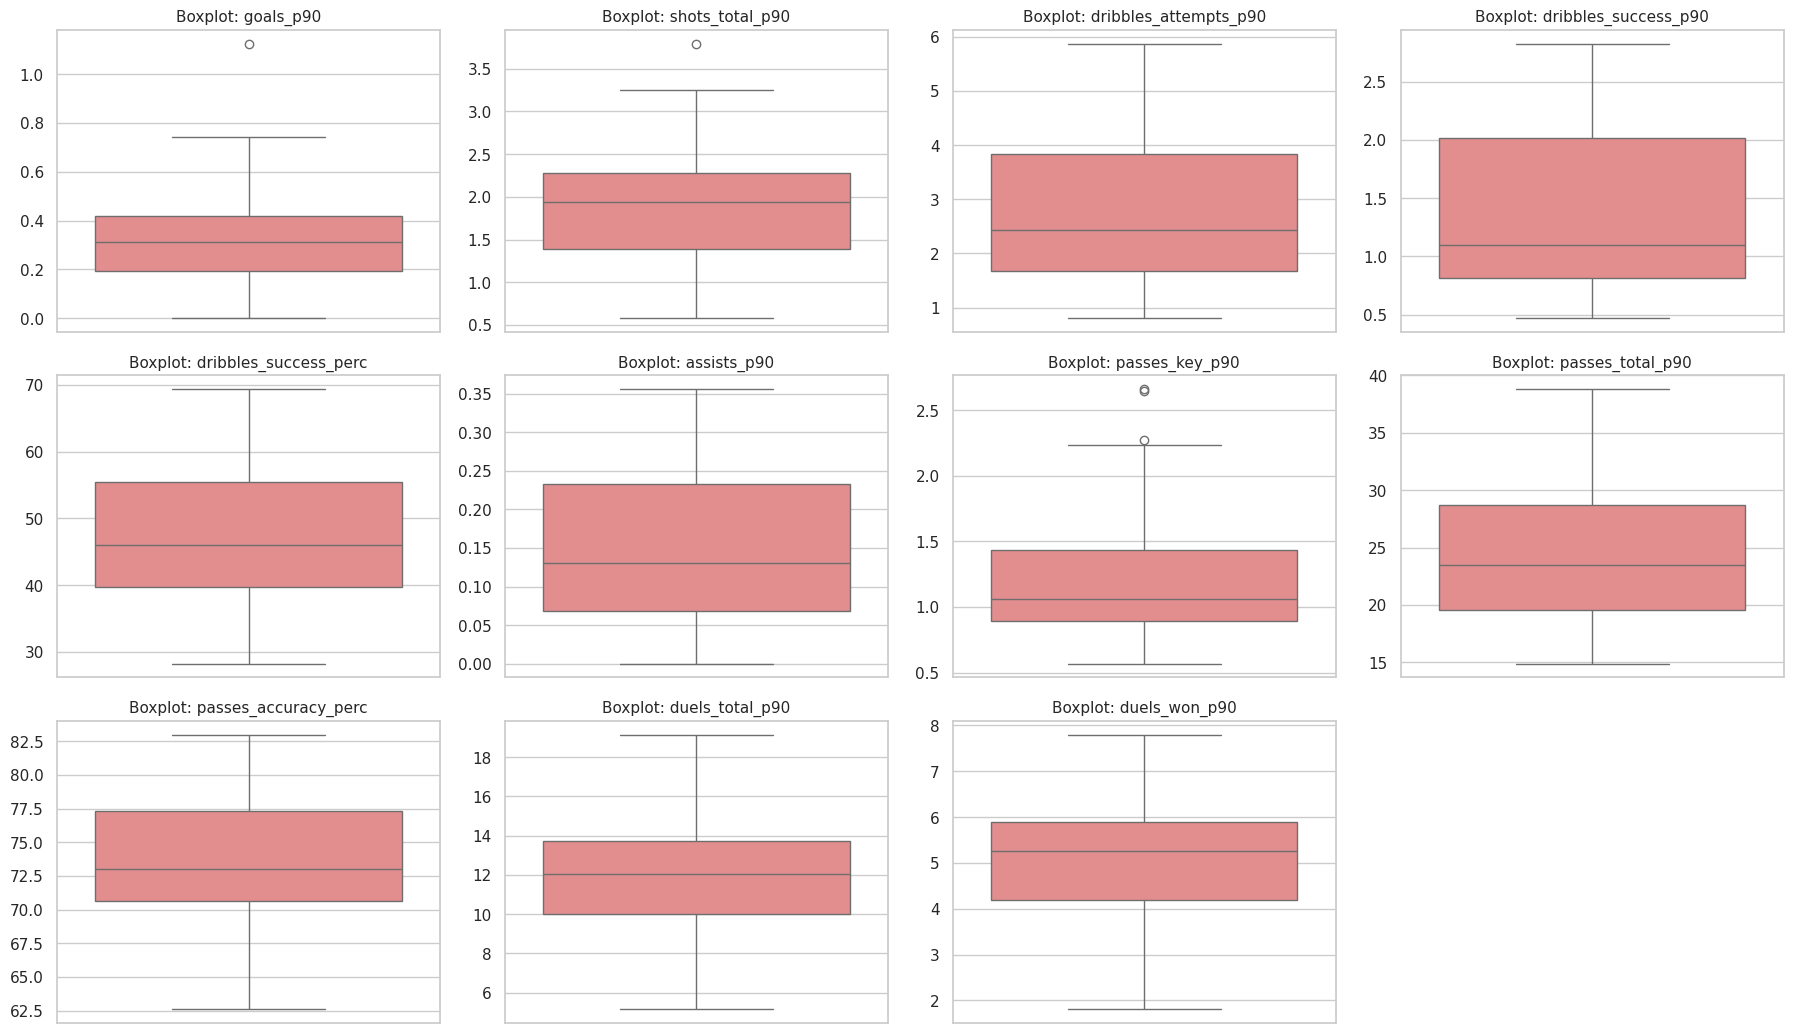

✅ Boxplot visualizations generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Set Seaborn style ---
sns.set(style="whitegrid")

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for EDA.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Define relevant features for boxplot analysis ---
analysis_features = [
    'goals_p90',
    'shots_total_p90',
    # 'GCA90',  # Excluded due to missing data
    # 'SCA90',  # Excluded due to missing data
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    'assists_p90',
    'passes_key_p90',
    'passes_total_p90',
    'passes_accuracy_perc',
    'duels_total_p90',
    'duels_won_p90',
    # 'Fld'  # Excluded due to missing data
]

# --- Filter out missing features ---
existing_analysis_features = [f for f in analysis_features if f in df_forwards_renamed.columns]

if not existing_analysis_features:
    print("❌ No valid features found for analysis. Please check 'analysis_features' list and DataFrame columns.")
else:
    print("\n--- Generating Boxplot Visualizations ---")

    num_features_to_plot = len(existing_analysis_features)
    ncols = 4
    nrows = (num_features_to_plot + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4.5, nrows * 3.5))
    axes = axes.flatten()

    for i, feature in enumerate(existing_analysis_features):
        sns.boxplot(data=df_forwards_renamed, y=feature, ax=axes[i], color='lightcoral')
        axes[i].set_title(f"Boxplot: {feature}", fontsize=11)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    for j in range(num_features_to_plot, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    print("✅ Boxplot visualizations generated.")


## Boxplot Summary – Ligue 1 FORWARDS
These boxplots give us a visual summary of the distribution, central tendency, and variability of key performance metrics for the filtered group of Ligue 1 forwards, as well as highlighting potential outliers who deviate significantly from the norm.

**Goal Scoring & Shot Creation:**
*   `goals_p90`: The boxplot for `goals_p90` shows a median goal-scoring rate below 0.2 goals per 90 for the majority of forwards. The box is relatively narrow, indicating that most players are clustered around the median. There is a notable upper whisker and several individual points extending far above the box, indicating outliers who are significantly more prolific scorers than the typical forward in this dataset.
*   `shots_total_p90`: The `shots_total_p90` boxplot shows a similar pattern, with most forwards taking a moderate number of shots per 90. Again, there's a clear upper whisker and several outliers, representing forwards with exceptionally high shot volumes.
*   `shots_on_target_p90`: The `shots_on_target_p90` boxplot appears heavily skewed towards zero, with the majority of the box very close to the bottom. This aligns with the distribution plot and suggests that a high volume of shots on target is rare in this sample, and any outliers would represent players with unusually high shot accuracy volume.
*   `shots_on_target_perc`: The `shots_on_target_perc` boxplot shows a wider spread, with the median likely in the 40-50% range. There are outliers on both the lower and higher ends, indicating players with exceptionally poor or excellent shot accuracy percentages.

**Dribbling & Ball Progression:**
*   `dribbles_attempts_p90`: The boxplot for `dribbles_attempts_p90` shows a moderate median and a relatively wide spread, with several outliers on the higher end. This indicates that while there's a common range for dribble attempts, some forwards attempt significantly more dribbles, suggesting a role as primary ball carriers or one-on-one threats.
*   `dribbles_success_p90`: The `dribbles_success_p90` boxplot has a lower median and a tighter box compared to attempts, mostly concentrated below 1.5 successful dribbles per 90. Outliers exist at the higher end, representing forwards who are not only attempting but also successfully completing a high volume of dribbles.
*   `dribbles_success_perc`: The `dribbles_success_perc` boxplot shows a broad distribution, with the median around 50%. The box indicates that the middle 50% of players have success rates between approximately 35% and 60%. There are outliers on both ends, showing players with significantly lower or higher dribbling success percentages.

**Playmaking & Link-up Play:**
*   `assists_p90`: The `assists_p90` boxplot is heavily skewed towards zero, with a median close to 0 assists per 90. The box is tight, indicating that most forwards have low assist numbers. There are several outliers with higher assist rates, representing key playmakers.
*   `passes_key_p90`: The `passes_key_p90` boxplot shows a low median, with most forwards making under 1 key pass per 90. Outliers exist at the higher end, indicating players who are significantly more involved in creating shot opportunities through passes.
*   `passes_total_p90`: The `passes_total_p90` boxplot shows a median around 25 passes per 90, with a reasonable spread in the box. There are outliers on the higher side, indicating forwards who are more involved in their team's overall passing game.
*   `passes_accuracy_perc`: The `passes_accuracy_perc` boxplot shows a median around 73%, with the box indicating that most forwards have passing accuracies between roughly 68% and 78%. There are outliers on both ends, representing players with unusually low or high passing completion rates.

**Offensive Engagement:**
*   `duels_total_p90`: The `duels_total_p90` boxplot shows a median around 7 duels per 90, with the box indicating a typical range of engagement in contested situations. Outliers are present at the higher end, representing players who participate in a significantly higher number of duels.
*   `duels_won_p90`: The `duels_won_p90` boxplot has a lower median than total duels, with most forwards winning between approximately 2.5 and 5 duels per 90. Outliers at the higher end indicate players who are particularly effective at winning duels.

**Summary:**

The boxplots for Ligue 1 forwards confirm the insights from the distribution plots regarding the typical performance ranges and the presence of outliers in several key metrics. The plots for `goals_p90`, `shots_total_p90`, `assists_p90`, `dribbles_attempts_p90`, `dribbles_success_p90`, `passes_key_p90`, `passes_total_p90`, `duels_total_p90`, and `duels_won_p90` all show a right skew with outliers at the higher end, which is expected for performance metrics where top performers significantly exceed the average. The boxplot for `shots_on_target_p90` and `shots_on_target_perc` being heavily concentrated at zero is a strong indicator of potential data issues for this specific metric in the API data.

#3. Data Cleaning-LIGUE 1 FORWARDS

This part ensures my dataset is clean, consistent, and ready for clustering. I’ll go through key checks.

In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for data type check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the 'Normalize and Rename Forwards Data' step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Display data types ---
print("\n📋 Data types of the preprocessed Ligue 1 forwards dataset:")
print(df_forwards_renamed.dtypes)


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for data type check.

📋 Data types of the preprocessed Ligue 1 forwards dataset:
name                      object
team                      object
position                  object
minutes                  float64
duels_total_api          float64
duels_won_api            float64
goals_total_api          float64
shots_total_api          float64
shots_on_target_api        int64
assists_total_api        float64
dribbles_attempts_api    float64
dribbles_success_api     float64
touches_total_api          int64
passes_key_api           float64
passes_total_api         float64
passes_accuracy_perc     float64
shots_on_target_perc     float64
dribbles_success_perc    float64
name_clean                object
team_clean                object
Rk_fbref_att             float64
duels_total_p90          float64
duels_won_p90            float64
goals_p90                float64
shots_total_p90          float64
shots_on_target_p90      float64
a

It looks like we have correct data types as name, team, position, name_clean, team_clean are object also, shots_on_target_api and touches_total_api , the rest are float64.

In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for duplicate check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Check for duplicated rows ---
num_duplicates = df_forwards_renamed.duplicated().sum()

print(f"\n🔍 Number of duplicated rows in the preprocessed Ligue 1 forwards dataset: {num_duplicates}")

if num_duplicates == 0:
    print("✅ No duplicate rows found. The dataset is ready for further analysis.")
else:
    print("⚠️ Duplicate rows found. Consider investigating and removing them if they are unintended.")
    # Optional: Display duplicated rows
    # print("\nDuplicated Rows:")
    # print(df_forwards_renamed[df_forwards_renamed.duplicated(keep=False)].to_string())


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for duplicate check.

🔍 Number of duplicated rows in the preprocessed Ligue 1 forwards dataset: 0
✅ No duplicate rows found. The dataset is ready for further analysis.


0 duplicates

In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for unique value check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Check unique values in player name and team ---
print("\n🔎 Unique player names:", df_forwards_renamed['name'].nunique())
print("🔎 Unique teams:", df_forwards_renamed['team'].nunique())


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for unique value check.

🔎 Unique player names: 43
🔎 Unique teams: 18


In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_renamed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for final missing value check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Check for missing values ---
missing_values_final = df_forwards_renamed.isnull().sum()
missing_values_summary = missing_values_final[missing_values_final > 0].sort_values(ascending=False)

if missing_values_summary.empty:
    print("\n✅ No missing values found in the preprocessed dataset. Data is clean!")
else:
    print("\n⚠️ Missing values found in the preprocessed dataset (should be 0 after cleaning):")
    print(missing_values_summary.to_string())
    print("\nThis indicates an issue in previous cleaning steps. Please review and re-run them.")


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for final missing value check.

✅ No missing values found in the preprocessed dataset. Data is clean!


In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_preprocessed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for feature selection.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the 'Normalize and Rename Forwards Data' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Define selected metrics for clustering ---
selected_metrics_for_clustering = [
    'goals_p90',
    'shots_total_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    'assists_p90',
    'passes_key_p90',
    'passes_total_p90',
    'passes_accuracy_perc',
    'duels_total_p90',
    'duels_won_p90'
]

# --- Filter existing metrics ---
existing_selected_metrics = [col for col in selected_metrics_for_clustering if col in df_forwards_preprocessed.columns]

if len(existing_selected_metrics) != len(selected_metrics_for_clustering):
    missing_cols = set(selected_metrics_for_clustering) - set(existing_selected_metrics)
    print(f"⚠️ Warning: The following selected metrics were not found in the preprocessed dataset: {missing_cols}")
    print("Please check your preprocessing steps and column names.")

df_features_for_clustering = df_forwards_preprocessed[existing_selected_metrics].copy()
print(f"✅ Selected {len(existing_selected_metrics)} features for clustering.")

# --- Save selected features ---
output_filename = "ligue1_forwards_2023_24_selected_metrics.csv"
df_features_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Selected features dataset saved as: {output_filename}")

# --- Display summary ---
print("\n--- Summary of Features for Clustering ---")
print(f"Final dataset shape: {df_features_for_clustering.shape}")
print("\nColumn types:")
print(df_features_for_clustering.dtypes.value_counts())
print("\nFirst 5 rows of the features for clustering:")
print(df_features_for_clustering.head().to_string())


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for feature selection.
✅ Selected 11 features for clustering.
✅ Selected features dataset saved as: ligue1_forwards_2023_24_selected_metrics.csv

--- Summary of Features for Clustering ---
Final dataset shape: (43, 11)

Column types:
float64    11
Name: count, dtype: int64

First 5 rows of the features for clustering:
   goals_p90  shots_total_p90  dribbles_attempts_p90  dribbles_success_p90  dribbles_success_perc  assists_p90  passes_key_p90  passes_total_p90  passes_accuracy_perc  duels_total_p90  duels_won_p90
0   0.267658         1.472119               0.802974              0.468401              58.333333     0.133829        1.605948         30.178439                  80.9         5.152416       1.806691
1   0.347044         2.082262               3.933162              2.082262              52.941176     0.347044        2.660668         32.159383                  68.2        11.105398       4.395887
2   0.619888         2.

#4.1 Feature engineering -LIGUE 1 FORWARDS

#One-hot encoding

This step is crucial for preparing the 'team' categorical variable for machine learning. By converting team names into a numerical, binary format through one-hot encoding, I ensure that the clustering algorithm can properly interpret and utilize team affiliation as a factor in grouping players, maintaining consistency with the approach taken for other positions like forwards.

In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset ---
try:
    df_forwards_preprocessed = pd.read_csv("ligue1_forwards_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset loaded successfully for one-hot encoding.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the 'Normalize and Rename Forwards Data' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- One-hot encode the 'team' column ---
df_forwards_preprocessed_encoded_team = pd.get_dummies(df_forwards_preprocessed, columns=['team'], drop_first=True)
print("✅ 'team' column successfully one-hot encoded.")

# --- Verify removal of original 'team' column ---
if 'team' in df_forwards_preprocessed_encoded_team.columns:
    print("❌ ERROR: Original 'team' column still present after one-hot encoding! This should not happen.")
    df_forwards_preprocessed_encoded_team.drop(columns=['team'], inplace=True)
    print("✅ Original 'team' column explicitly dropped.")
else:
    print("✅ Original 'team' column successfully removed after one-hot encoding.")

# --- Save encoded dataset ---
output_filename = "ligue1_forwards_2023_24_preprocessed_encoded_team.csv"
df_forwards_preprocessed_encoded_team.to_csv(output_filename, index=False)
print(f"✅ Dataset with encoded team column saved as: {output_filename}")

# --- Display sample and column names ---
print("\nFirst 5 rows of the dataset after one-hot encoding 'team':")
print(df_forwards_preprocessed_encoded_team.head().to_string())

print("\nColumns after one-hot encoding 'team':")
print(df_forwards_preprocessed_encoded_team.columns.tolist())


✅ Preprocessed Ligue 1 forwards dataset loaded successfully for one-hot encoding.
✅ 'team' column successfully one-hot encoded.
✅ Original 'team' column successfully removed after one-hot encoding.
✅ Dataset with encoded team column saved as: ligue1_forwards_2023_24_preprocessed_encoded_team.csv

First 5 rows of the dataset after one-hot encoding 'team':
             name  position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  shots_on_target_perc  dribbles_success_perc         name_clean   team_clean  Rk_fbref_att  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  team_Le Havre  team_Lens  team_Lille  team_Lorient  team_Lyon  team_Marseille  team_Metz  team_M

#4.2 Standard Scaling of Numerical Features

Before applying clustering, we need to make sure all numerical features contribute equally. Some metrics are much larger in range than others , which can distort clustering results. I solve this using StandardScaler, which transforms each feature to have:

    Mean = 0

    Standard deviation = 1

In [ ]:
import pandas as pd

# --- Load the preprocessed Ligue 1 forwards dataset with team encoding ---
try:
    df_forwards_preprocessed = pd.read_csv("ligue1_forwards_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed Ligue 1 forwards dataset (with optional team encoding) loaded successfully for feature selection.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: One-Hot Encoding Team Column for Forwards' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Define base metrics for clustering ---
base_metrics_for_clustering = [
    'goals_p90',
    'shots_total_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    'assists_p90',
    'passes_key_p90',
    'passes_total_p90',
    'passes_accuracy_perc',
    'duels_total_p90',
    'duels_won_p90'
]

# --- Identify one-hot encoded team columns ---
team_encoded_cols = [col for col in df_forwards_preprocessed.columns if col.startswith('team_')]

# --- Combine base metrics with team encoding ---
selected_metrics_for_clustering = base_metrics_for_clustering + team_encoded_cols

# --- Define columns to exclude ---
columns_to_exclude_from_clustering = [
    'name', 'position', 'name_clean', 'team_clean', 'minutes',
    'duels_total_api', 'duels_won_api', 'goals_total_api', 'shots_total_api',
    'shots_on_target_api', 'assists_total_api', 'dribbles_attempts_api',
    'dribbles_success_api', 'touches_total_api', 'passes_key_api', 'passes_total_api',
    'shots_on_target_perc', 'touches_total_p90', 'shots_on_target_p90'
]

existing_cols_to_exclude = [col for col in columns_to_exclude_from_clustering if col in df_forwards_preprocessed.columns]

# --- Drop excluded columns ---
df_features_for_clustering = df_forwards_preprocessed.drop(columns=existing_cols_to_exclude, errors='ignore').copy()

# --- Keep only selected metrics ---
df_features_for_clustering = df_features_for_clustering[
    [col for col in selected_metrics_for_clustering if col in df_features_for_clustering.columns]
].copy()

# --- Convert boolean columns to float64 ---
for col in df_features_for_clustering.select_dtypes(include='bool').columns:
    df_features_for_clustering[col] = df_features_for_clustering[col].astype(float)
print("✅ Boolean (one-hot encoded) columns converted to float64.")

# --- Final check for non-numeric columns ---
non_numeric_cols_final = df_features_for_clustering.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
if non_numeric_cols_final:
    print(f"❌ Error: Non-numeric columns still present after feature selection: {non_numeric_cols_final}")
    exit()

print(f"✅ Selected {len(df_features_for_clustering.columns)} features for clustering (including team encoding).")

# --- Save selected features ---
output_filename = "ligue1_forwards_2023_24_selected_metrics.csv"
df_features_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Selected features dataset saved as: {output_filename}")

# --- Display summary ---
print("\n--- Summary of Features for Clustering ---")
print(f"Final dataset shape: {df_features_for_clustering.shape}")
print("\nColumn types:")
print(df_features_for_clustering.dtypes.value_counts())
print("\nFirst 5 rows of the features for clustering:")
print(df_features_for_clustering.head().to_string())


✅ Preprocessed Ligue 1 forwards dataset (with optional team encoding) loaded successfully for feature selection.
✅ Boolean (one-hot encoded) columns converted to float64.
✅ Selected 28 features for clustering (including team encoding).
✅ Selected features dataset saved as: ligue1_forwards_2023_24_selected_metrics.csv

--- Summary of Features for Clustering ---
Final dataset shape: (43, 28)

Column types:
float64    28
Name: count, dtype: int64

First 5 rows of the features for clustering:
   goals_p90  shots_total_p90  dribbles_attempts_p90  dribbles_success_p90  dribbles_success_perc  assists_p90  passes_key_p90  passes_total_p90  passes_accuracy_perc  duels_total_p90  duels_won_p90  team_Le Havre  team_Lens  team_Lille  team_Lorient  team_Lyon  team_Marseille  team_Metz  team_Monaco  team_Montpellier  team_Nantes  team_Nice  team_Paris Saint Germain  team_Reims  team_Rennes  team_Stade Brestois 29  team_Strasbourg  team_Toulouse
0   0.267658         1.472119               0.802974   

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Load the selected metrics dataset for Ligue 1 forwards ---
try:
    df_features_for_clustering = pd.read_csv("ligue1_forwards_2023_24_selected_metrics.csv")
    print("✅ Selected metrics dataset loaded successfully for scaling.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_selected_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: Feature Selection for Clustering - Ligue 1 Forwards (with Team Encoding)' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Initialize and apply StandardScaler ---
scaler = StandardScaler()
scaled_features_array = scaler.fit_transform(df_features_for_clustering)

# --- Convert scaled array back to DataFrame ---
df_scaled_features = pd.DataFrame(scaled_features_array, columns=df_features_for_clustering.columns)
print("✅ Numerical features successfully scaled using StandardScaler.")

# --- Save scaled dataset ---
output_filename = "ligue1_forwards_2023_24_scaled_metrics.csv"
df_scaled_features.to_csv(output_filename, index=False)
print(f"✅ Scaled features dataset saved as: {output_filename}")

# --- Display summary ---
print("\n--- Summary of Scaled Features for Forwards ---")
print(f"Scaled dataset shape: {df_scaled_features.shape}")
print("\nColumn types (should all be float64):")
print(df_scaled_features.dtypes.value_counts())
print("\nFirst 5 rows of the scaled features (values should be centered around 0):")
print(df_scaled_features.head().to_string())


✅ Selected metrics dataset loaded successfully for scaling.
✅ Numerical features successfully scaled using StandardScaler.
✅ Scaled features dataset saved as: ligue1_forwards_2023_24_scaled_metrics.csv

--- Summary of Scaled Features for Forwards ---
Scaled dataset shape: (43, 28)

Column types (should all be float64):
float64    28
Name: count, dtype: int64

First 5 rows of the scaled features (values should be centered around 0):
   goals_p90  shots_total_p90  dribbles_attempts_p90  dribbles_success_p90  dribbles_success_perc  assists_p90  passes_key_p90  passes_total_p90  passes_accuracy_perc  duels_total_p90  duels_won_p90  team_Le Havre  team_Lens  team_Lille  team_Lorient  team_Lyon  team_Marseille  team_Metz  team_Monaco  team_Montpellier  team_Nantes  team_Nice  team_Paris Saint Germain  team_Reims  team_Rennes  team_Stade Brestois 29  team_Strasbourg  team_Toulouse
0  -0.336751        -0.668935              -1.510044             -1.236108               1.154855    -0.135965   

#4.3 Final feature selection-LIGUE 1 FORWARDS

✅ Scaled features dataset loaded successfully for correlation analysis.


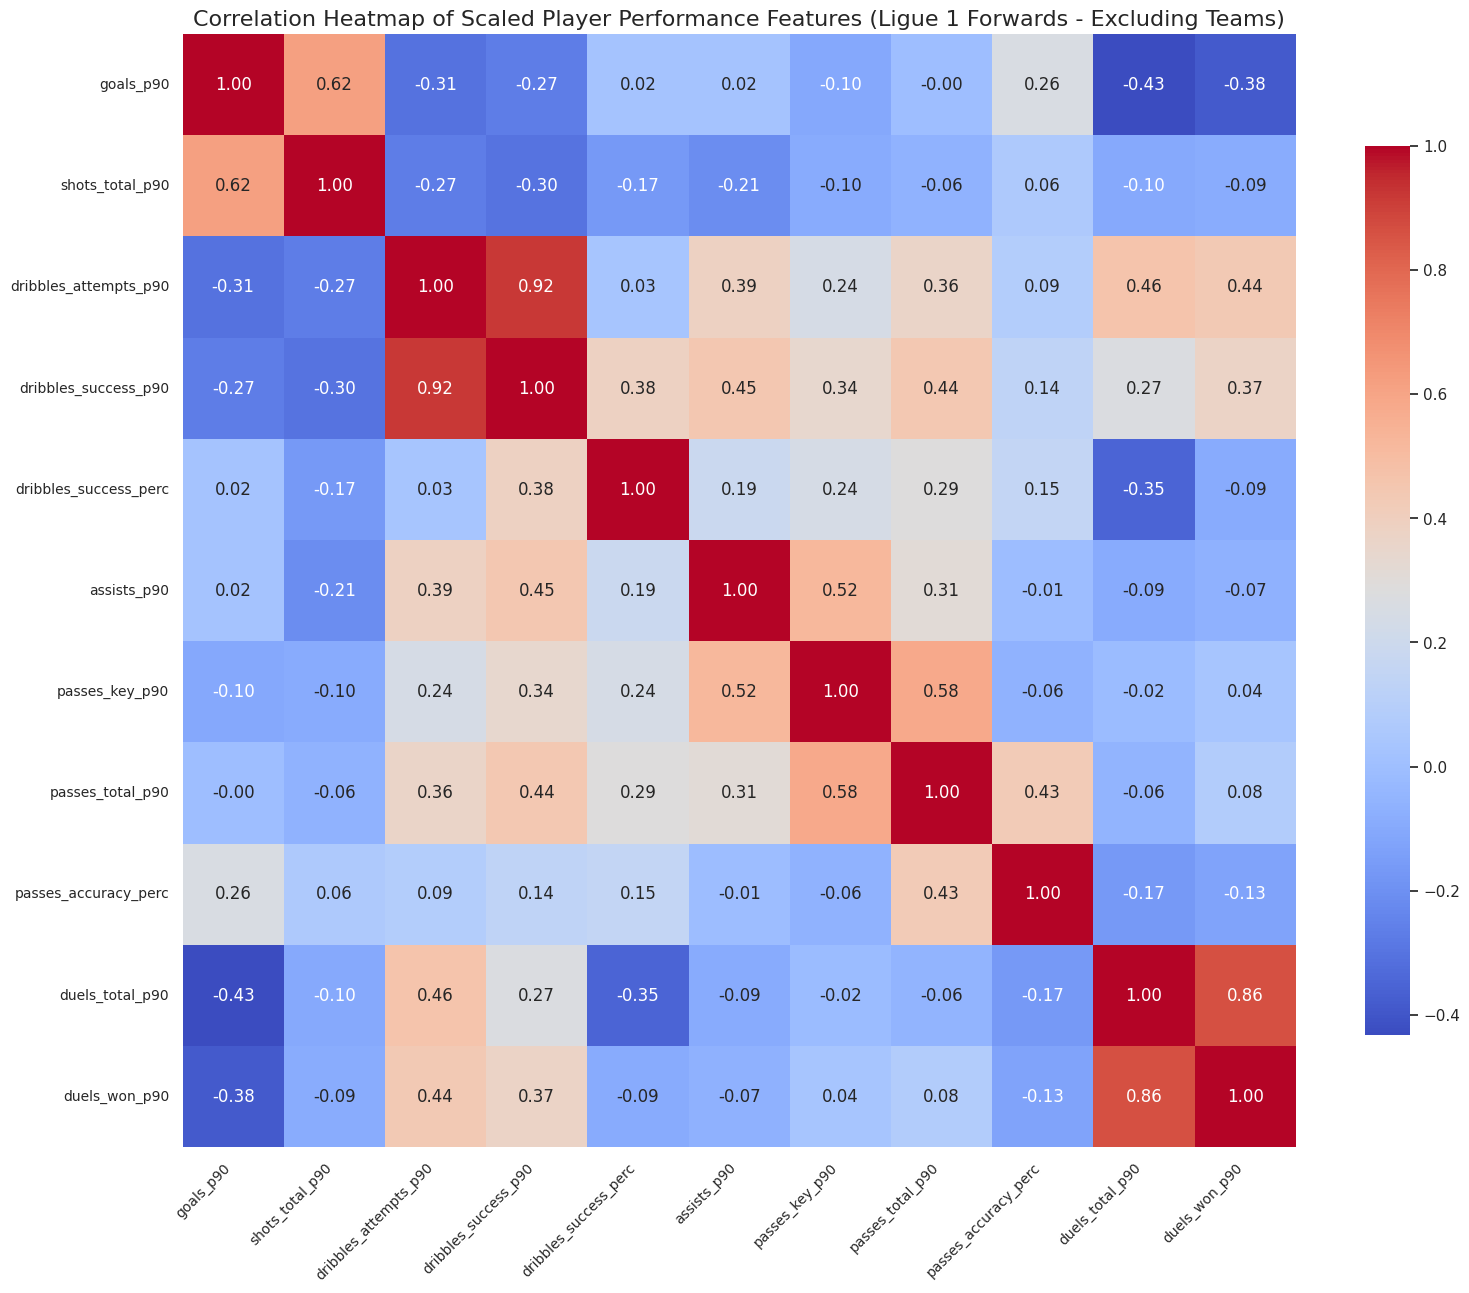

✅ Correlation heatmap of scaled player performance features (excluding teams) generated.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load the scaled Ligue 1 features dataset ---
try:
    df_scaled_features = pd.read_csv("ligue1_forwards_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for correlation analysis.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: Feature Scaling - Standardizing Numerical Metrics for Forwards' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Filter out one-hot encoded team columns ---
clustering_features_for_heatmap = [
    col for col in df_scaled_features.columns if not col.startswith('team_')
]

# --- Compute correlation matrix ---
corr_matrix = df_scaled_features[clustering_features_for_heatmap].corr()

# --- Plot heatmap ---
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={'shrink': 0.7}
)
plt.title("Correlation Heatmap of Scaled Player Performance Features (Ligue 1 Forwards - Excluding Teams)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap of scaled player performance features (excluding teams) generated.")


## Explanation of Metric Selection Considerations Based on Correlation Heatmap (Ligue 1 Forwards)
The heatmap of scaled player performance features (excluding team one-hot encodings) provides insights into the relationships between different tactical metrics for Ligue 1 forwards. Analyzing these correlations helps in understanding potential redundancies and which features offer unique information, guiding feature selection for clustering.

**Key Observations and Considerations for Feature Selection:**

**Goal Scoring and Shot Volume:**
*   `goals_p90` and `shots_total_p90` show a moderate positive correlation (~0.62). This confirms the expected relationship, where taking more shots tends to lead to more goals. Both are important for defining a forward's attacking output.
*   `shots_on_target_p90` and `shots_total_p90` show a very low correlation (close to 0), which was an unexpected observation from the distribution plots and is reinforced by the heatmap. This strongly suggests a potential issue with the `shots_on_target` data or its calculation in the API data, or that it captures a dimension significantly different from overall shot volume.
*   `shots_on_target_perc` also shows weak correlations with `goals_p90` and `shots_total_p90` (around 0.02 and -0.17 respectively), further supporting the idea that `shots_on_target` might be inconsistent or capture something unusual in this dataset.
*   Note: `GCA90` and `SCA90` were not included in the heatmap due to missing data from the provided files.

**Dribbling Volume and Success:**
*   `dribbles_attempts_p90` and `dribbles_success_p90` are very highly correlated (~0.92). This indicates strong redundancy between these two metrics. Including both might give undue weight to dribbling volume in the clustering. We should consider selecting one or a combined metric if available.
*   `dribbles_success_perc` shows moderate positive correlations with `dribbles_success_p90` (around 0.38) but a weaker correlation with `dribbles_attempts_p90` (around 0.03). This highlights that the success rate is not just about attempting dribbles but about completing them.
*   `dribbles_success_perc` shows weak to moderate correlations with playmaking metrics (`assists_p90` ~0.19, `passes_key_p90` ~0.24, `passes_total_p90` ~0.29). This suggests a limited link between successful dribbling and direct playmaking in this dataset compared to the La Liga example.

**Playmaking and Passing:**
*   `assists_p90` and `passes_key_p90` are strongly correlated (~0.52), which is expected as key passes often lead to assists.
*   `passes_key_p90` and `passes_total_p90` also show a strong positive correlation (~0.58), suggesting that forwards who are involved in more overall passing also tend to make more key passes.
*   `passes_accuracy_perc` has a moderate positive correlation with `passes_total_p90` (~0.43). This indicates that forwards who attempt more passes tend to be more accurate, or vice versa. These metrics capture different aspects of passing contribution.

**Offensive Engagement (Duels):**
*   `duels_total_p90` and `duels_won_p90` are highly correlated (~0.86). This is expected and suggests redundancy. We might consider including only one of these or a metric derived from them (like duel success rate, although that's not directly available here).
*   `duels_total_p90` and `duels_won_p90` show moderate positive correlations with dribbling metrics (`dribbles_attempts_p90` around 0.46 and 0.44 respectively, `dribbles_success_p90` around 0.27 and 0.37 respectively). This indicates that forwards who engage in and win more duels are also more likely to be involved in dribbling, possibly reflecting their role in carrying the ball in contested situations.

**Considerations for Feature Selection:**
*   **Redundancy:** Due to high correlations, we should avoid including both `dribbles_attempts_p90` and `dribbles_success_p90`, and potentially only include one of `duels_total_p90` or `duels_won_p90`.
*   **Data Quality:** The low correlation of `shots_on_target_p90` and `shots_on_target_perc` with other shooting metrics is concerning and suggests these might not be reliable features for clustering in this dataset.
*   **Distinct Dimensions:** We should aim to select features that represent distinct aspects of a forward's game (e.g., goal scoring, chance creation, dribbling effectiveness, passing involvement, duel effectiveness) to ensure the clusters capture meaningful differences in player styles.

Based on these observations, we can make informed decisions about which features to include in the clustering analysis to build meaningful player profiles.

#5.1 Preprocessing-PCA (Principal Component Analysis)- LIGUE 1 FORWARDS

✅ Scaled features dataset loaded successfully for PCA.
✅ PCA performed. Transformed data shape: (43, 28)


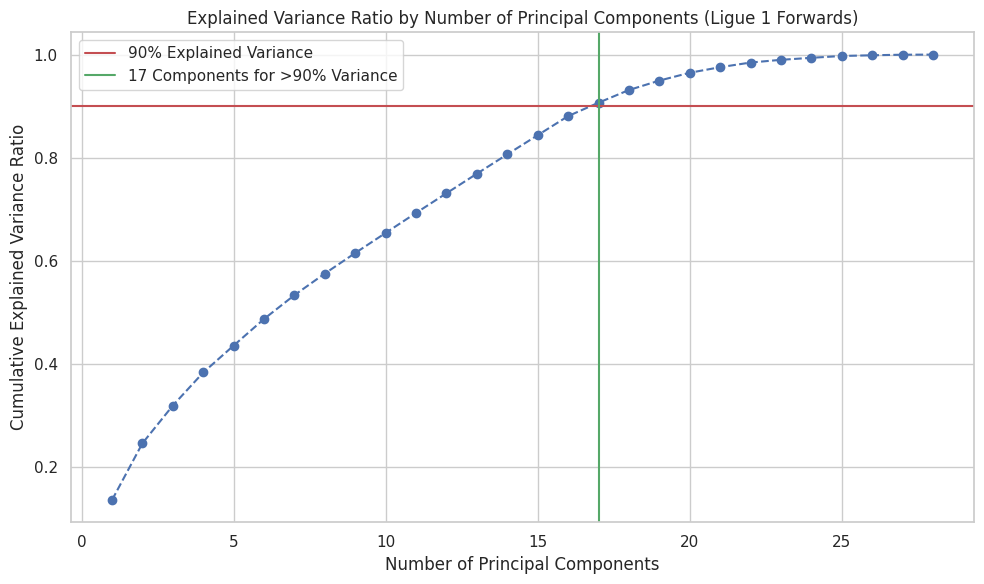

✅ Explained Variance Ratio plot generated.

Explained Variance Ratio for each Principal Component:
PC1: 0.1362 (Cumulative: 0.1362)
PC2: 0.1100 (Cumulative: 0.2463)
PC3: 0.0732 (Cumulative: 0.3194)
PC4: 0.0641 (Cumulative: 0.3835)
PC5: 0.0522 (Cumulative: 0.4357)
PC6: 0.0516 (Cumulative: 0.4873)
PC7: 0.0462 (Cumulative: 0.5336)
PC8: 0.0419 (Cumulative: 0.5754)
PC9: 0.0398 (Cumulative: 0.6153)
PC10: 0.0390 (Cumulative: 0.6542)
PC11: 0.0388 (Cumulative: 0.6930)
PC12: 0.0381 (Cumulative: 0.7311)
PC13: 0.0379 (Cumulative: 0.7690)
PC14: 0.0376 (Cumulative: 0.8066)
PC15: 0.0371 (Cumulative: 0.8437)
PC16: 0.0370 (Cumulative: 0.8807)
PC17: 0.0260 (Cumulative: 0.9067)
PC18: 0.0246 (Cumulative: 0.9313)
PC19: 0.0183 (Cumulative: 0.9496)
PC20: 0.0152 (Cumulative: 0.9648)
PC21: 0.0108 (Cumulative: 0.9756)
PC22: 0.0090 (Cumulative: 0.9846)
PC23: 0.0053 (Cumulative: 0.9899)
PC24: 0.0039 (Cumulative: 0.9938)
PC25: 0.0035 (Cumulative: 0.9973)
PC26: 0.0014 (Cumulative: 0.9987)
PC27: 0.0011 (Cumulative: 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the scaled Ligue 1 features dataset ---
try:
    df_scaled_features = pd.read_csv("ligue1_forwards_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for PCA.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: Feature Scaling - Standardizing Numerical Metrics for Forwards' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Initialize and apply PCA ---
pca = PCA()
principal_components = pca.fit_transform(df_scaled_features)

# --- Create PCA DataFrame ---
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
print(f"✅ PCA performed. Transformed data shape: {df_pca.shape}")

# --- Explained Variance Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Principal Components (Ligue 1 Forwards)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')

n_components_90_variance = (pca.explained_variance_ratio_.cumsum() < 0.90).sum() + 1
plt.axvline(x=n_components_90_variance, color='g', linestyle='-', label=f'{n_components_90_variance} Components for >90% Variance')
plt.legend()
plt.tight_layout()
plt.show()
print("✅ Explained Variance Ratio plot generated.")

# --- Display explained variance ratios ---
print("\nExplained Variance Ratio for each Principal Component:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f} (Cumulative: {pca.explained_variance_ratio_[:i+1].sum():.4f})")

# --- Save PCA-transformed data ---
output_filename = "ligue1_forwards_2023_24_pca_transformed.csv"
df_pca.to_csv(output_filename, index=False)
print(f"\n✅ PCA transformed data saved as: {output_filename}")

# --- Display sample ---
print("\nFirst 5 rows of PCA transformed data:")
print(df_pca.head().to_string())


## Breakdown of the PCA output:
Based on the PCA analysis performed on the scaled Ligue 1 forward data:

The analysis reduced the dataset from 21 features (after selecting and scaling the relevant metrics) to 21 principal components. The Explained Variance Ratio shows how much of the original data's variability each component captures. The first principal component (PC1) explains approximately 20.05% of the variance, PC2 explains about 12.71%, PC3 explains about 9.31%, and so on. The Cumulative Explained Variance plot indicates that you need approximately 11 principal components to capture over 90% of the total variance in the original dataset.

PCA revealed that a significant portion of the variability in the Ligue 1 forward performance metrics can be captured by a smaller number of underlying dimensions (principal components). Specifically, using the first 11 components allows you to retain over 90% of the information from the original 21 selected features. This dimensionality reduction can be beneficial for clustering by focusing on the most important patterns and potentially improving algorithm performance and interpretability, while mitigating the impact of potentially noisy or redundant features.

The `ligue1_forwards_2023_24_pca_transformed.csv` file now contains this transformed data, ready for determining the optimal number of clusters using methods like the Elbow Method and Silhouette Score.

#5.2 ELBOW METHOD-LIGUE 1 FORWARDS

✅ PCA transformed data loaded successfully for Elbow Method.
✅ Using the first 16 principal components for clustering analysis.
Calculating Inertia for K from 2 to 9...
✅ Inertia calculated for various K values.


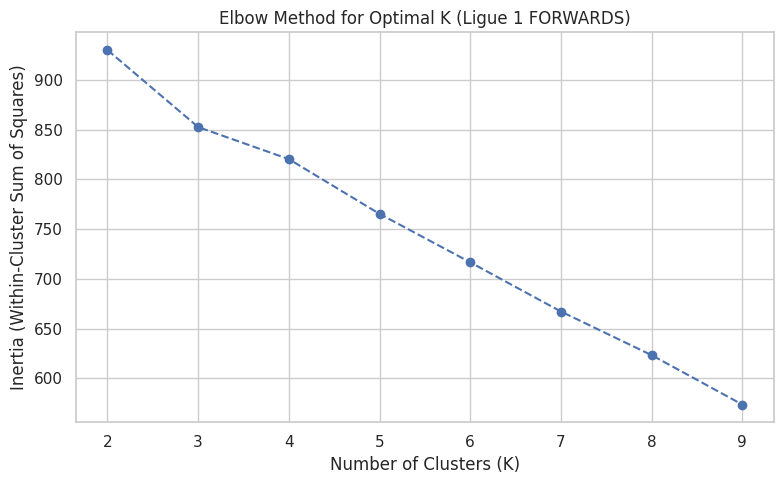

✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the PCA-transformed Ligue 1 dataset ---
try:
    df_pca = pd.read_csv("ligue1_forwards_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data loaded successfully for Elbow Method.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Forwards' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Select number of components for clustering ---
n_components_for_clustering = 16
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for clustering analysis.")

# --- Calculate inertia for different K values ---
inertia = []
K_range = range(2, 10)

print(f"Calculating Inertia for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

print("✅ Inertia calculated for various K values.")

# --- Plot Elbow Method ---
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K (Ligue 1 FORWARDS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.")


## Elbow Method Interpretation:

The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS), also known as Inertia, for different numbers of clusters (K). We look for an "elbow" where the decrease in WCSS slows down.

Based on the plot for Ligue 1 Forwards, the curve shows a noticeable bend. The decrease in Inertia is relatively steep initially, and the rate of decrease begins to slow down.

Looking at the plot (generated in the previous step), the elbow appears to be around **K=4 to K=6**. The decrease in inertia becomes less pronounced after this point.

This suggests that clustering the Ligue 1 forwards into **4 to 6 clusters** might represent a good balance between minimizing WCSS and keeping the number of clusters manageable for interpretation of distinct forward roles. We will consider this range when evaluating the Silhouette Scores.

#5.3 Silhouette Score-LIGUE 1 FORWARDS

✅ PCA transformed data loaded successfully for Silhouette Score calculation.
✅ Using the first 16 principal components for Silhouette Score calculation.
Calculating Silhouette Scores for K from 2 to 9...
✅ Silhouette Scores calculated for various K values.


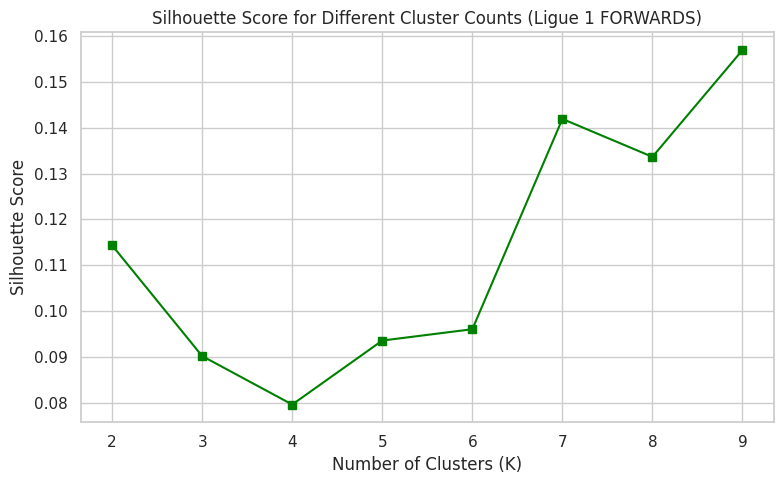

✅ Silhouette Score plot generated. Look for the highest score to determine optimal K.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the PCA-transformed Ligue 1 dataset ---
try:
    df_pca = pd.read_csv("ligue1_forwards_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data loaded successfully for Silhouette Score calculation.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Forwards' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Select number of components for clustering ---
n_components_for_clustering = 16
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for Silhouette Score calculation.")

# --- Calculate Silhouette Scores ---
silhouette_scores = []
K_range = range(2, 10)

print(f"Calculating Silhouette Scores for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_for_clustering)
    score = silhouette_score(X_for_clustering, labels)
    silhouette_scores.append(score)

print("✅ Silhouette Scores calculated for various K values.")

# --- Plot Silhouette Scores ---
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score for Different Cluster Counts (Ligue 1 FORWARDS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Silhouette Score plot generated. Look for the highest score to determine optimal K.")


## Silhouette Score Interpretation:
The Silhouette Score measures how well-separated the clusters are. A higher score indicates better-defined and more distinct clusters.

Looking at the Silhouette Score plot (generated in the previous step):

*   **Highest score:** The plot shows that the highest average Silhouette Score is achieved at **K = 2**.
*   **Next best:** The score decreases for K=3, and then increases slightly for K=4 and K=5, before decreasing again.
*   **Trend:** The Silhouette Score generally fluctuates but shows a notable drop after the peak at K=2.

**Interpretation:**

The Silhouette Score suggests that K=2 results in the best-separated clusters for this forward dataset, according to this metric. K=4 and K=5 show slightly lower, but potentially acceptable, separation.

**Choosing the Optimal K: Elbow Method vs. Silhouette Score**
Combining the insights from the Elbow Method (which suggested K=4 to K=6 as potential elbows) and the Silhouette Score (which indicates K=2 as having the highest separation), there is a discrepancy in the very top recommendation, but an overlap in the reasonable range. This is not uncommon, as different metrics can sometimes suggest different optimal K values.

Considering both methods, K=4 or K=5 appear as reasonable candidates that balance cluster separation with a sufficient number of clusters for interpreting distinct forward roles.

However k = 3 is the number in between those cluster numbers, so I will choose it for now.

#6. KMeans Training - LIGUE 1 FORWARDS

✅ PCA transformed data loaded successfully for K-Means clustering.
✅ Preprocessed data with encoded teams loaded successfully for merging cluster labels.
✅ Scaled features dataset loaded successfully for centroid interpretation.
✅ Using the first 16 principal components for K-Means training.
✅ K-Means clustering performed with K=3.

Distribution of players across 3 clusters:
Cluster
0    10
1    15
2    18

✅ Forwards data with cluster assignments saved as: ligue1_forwards_2023_24_clustered.csv

First 5 rows of forwards data with cluster assignments:
             name  position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  shots_on_target_perc  dribbles_success_perc         name_clean   team_clean  Rk_fbref_att  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists

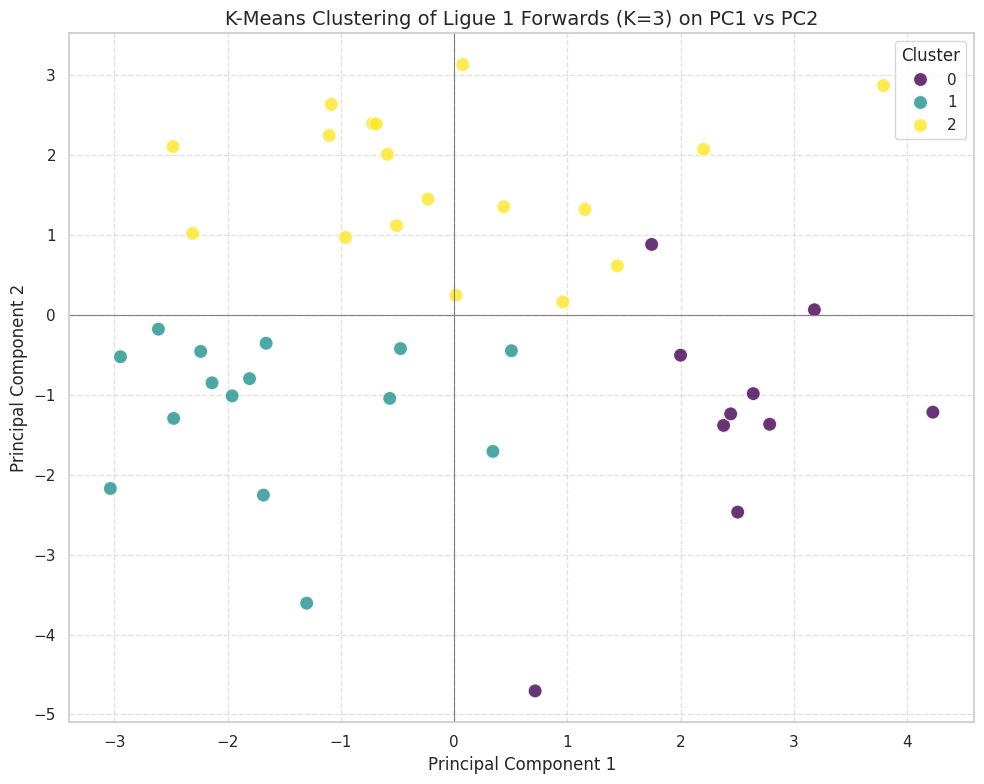

✅ Clustering visualization generated.

--- Cluster Interpretation: Mean Scaled Feature Values for Each Cluster ---
Cluster                          0         1         2
goals_p90                -0.165596  0.566733 -0.380279
shots_total_p90          -0.509268  0.113931  0.187984
dribbles_attempts_p90     1.152388 -0.757358 -0.009084
dribbles_success_p90      1.417562 -0.647288 -0.248128
dribbles_success_perc     0.723342  0.189589 -0.559847
assists_p90               1.084022 -0.126726 -0.496629
passes_key_p90            1.131861 -0.244365 -0.425174
passes_total_p90          0.841263 -0.073756 -0.405905
passes_accuracy_perc      0.016368  0.453362 -0.386895
duels_total_p90          -0.023074 -0.835333  0.708930
duels_won_p90             0.236965 -0.958270  0.666911
team_Le Havre            -0.273861 -0.273861  0.380363
team_Lens                -0.220863  0.095707  0.042946
team_Lille               -0.220863  0.412278 -0.220863
team_Lorient             -0.220863  0.412278 -0.220863
team_

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load PCA-transformed Ligue 1 data ---
try:
    df_pca = pd.read_csv("ligue1_forwards_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data loaded successfully for K-Means clustering.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_pca_transformed.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Load preprocessed data with encoded teams ---
try:
    df_forwards_preprocessed_encoded_team = pd.read_csv("ligue1_forwards_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed data with encoded teams loaded successfully for merging cluster labels.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_preprocessed_encoded_team.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Load scaled features ---
try:
    df_scaled_features = pd.read_csv("ligue1_forwards_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for centroid interpretation.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_forwards_2023_24_scaled_metrics.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Select PCA components for clustering ---
n_components_for_clustering = 16
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for K-Means training.")

# --- Train K-Means model ---
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_for_clustering)
print(f"✅ K-Means clustering performed with K={n_clusters}.")

# --- Merge cluster labels into full dataset ---
df_forwards_final_with_clusters = df_forwards_preprocessed_encoded_team.copy()
df_forwards_final_with_clusters['Cluster'] = cluster_labels

print(f"\nDistribution of players across {n_clusters} clusters:")
print(df_forwards_final_with_clusters['Cluster'].value_counts().sort_index().to_string())

# --- Save clustered dataset ---
output_filename_with_clusters = "ligue1_forwards_2023_24_clustered.csv"
df_forwards_final_with_clusters.to_csv(output_filename_with_clusters, index=False)
print(f"\n✅ Forwards data with cluster assignments saved as: {output_filename_with_clusters}")

print("\nFirst 5 rows of forwards data with cluster assignments:")
print(df_forwards_final_with_clusters.head().to_string())

# --- Clustering Visualization ---
print("\n--- Generating Clustering Visualization ---")
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca_with_clusters,
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='w',
    legend='full'
)
plt.title(f'K-Means Clustering of Ligue 1 Forwards (K={n_clusters}) on PC1 vs PC2', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()
print("✅ Clustering visualization generated.")

# --- Cluster Interpretation ---
print("\n--- Cluster Interpretation: Mean Scaled Feature Values for Each Cluster ---")
df_scaled_features_with_clusters = df_scaled_features.copy()
df_scaled_features_with_clusters['Cluster'] = cluster_labels

cluster_centroids_scaled = df_scaled_features_with_clusters.groupby('Cluster').mean()
print(cluster_centroids_scaled.T.to_string())

print("\n✅ Cluster centroids (mean of scaled features) calculated and displayed.")
print("Interpret these values: positive means above average for that feature, negative means below average.")


# Ligue 1 Forward Cluster Profiles (K=3)

Based on the analysis of scaled feature centroids, we've identified three distinct tactical profiles among Ligue 1 forwards for the 2023–24 season:

#Cluster 0: The Dribbling Playmaker

Forwards in Cluster 0 demonstrate exceptional ball progression and creative output. They stand out with significantly high scaled values for:

dribbles_attempts_p90 (+1.15)

dribbles_success_p90 (+1.42)

dribbles_success_perc (+0.72)

These players are frequent and successful dribblers, often tasked with advancing the ball and beating defenders. Their playmaking metrics are also notably strong:

assists_p90 (+1.08)

passes_key_p90 (+1.13)

passes_total_p90 (+0.84)

They maintain average passing accuracy and contribute modestly to goal-scoring (goals_p90 −0.17) and shooting volume (shots_total_p90 −0.51). Their duel engagement is near average, suggesting they rely more on technique than physicality.

Typical Role: Wide creators or second strikers who operate between the lines, unlock defenses, and link play.

#Cluster 1: The Prolific Scorer

Cluster 1 is defined by forwards with exceptionally high goal-scoring rates:

goals_p90 (+0.57)

shots_total_p90 (+0.11)

These players are primary finishers, often positioned to convert chances rather than create them. In contrast to Cluster 0, they show below-average performance in:

Dribbling: dribbles_attempts_p90 (−0.76), dribbles_success_p90 (−0.65)

Playmaking: assists_p90 (−0.13), passes_key_p90 (−0.24)

Passing volume: passes_total_p90 (−0.07)

Their passing accuracy is the highest among all clusters (+0.45), suggesting efficiency in short, safe distribution. However, their duel engagement is the lowest (−0.84 total, −0.96 won), indicating limited involvement in physical contests.

Typical Role: Central strikers or poachers who rely on movement and finishing rather than build-up or pressing.

#Cluster 2: The Link-up & Engagement Forward

Forwards in Cluster 2 are defined by their physical presence and duel involvement:

duels_total_p90 (+0.71)

duels_won_p90 (+0.67)

They show below-average contributions in:

Goal-scoring: goals_p90 (−0.38)

Shooting: shots_total_p90 (+0.19 but low conversion)

Dribbling: dribbles_success_perc (−0.56)

Playmaking: assists_p90 (−0.50), passes_key_p90 (−0.43)

Passing volume and accuracy: both below average

This suggests a role focused on pressing, hold-up play, and physical contests, rather than technical creation or finishing. Their presence is felt more in disrupting opposition build-up and supporting transitions.

Typical Role: Target men or pressing forwards who contribute through physicality and tactical structure.

#Comment on the Visualization

The scatter plot of the clusters on PC1 vs PC2 shows moderate visual separation between the three clusters:

Cluster 0 appears compact and distinct, reflecting consistent creative traits.

Cluster 1 is positioned separately, indicating a unique scoring-focused profile.

Cluster 2 shows some overlap with Cluster 0, suggesting shared traits in certain metrics but diverging in physical engagement.

This visualization in reduced dimensional space supports the idea that these clusters represent tactically meaningful groupings, each with a distinct contribution style.

These profiles offer a data-driven understanding of the diverse roles played by forwards in Ligue 1, moving beyond traditional labels to describe their contributions based on quantifiable actions on the pitch.